In [1]:
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.8.0")

LoadError: UndefVarError: github_project not defined

In [1]:
using InstantiateFromURL
using LinearAlgebra,Base, Statistics,Plots,NLsolve
using StaticArrays, Parameters,ForwardDiff,Distributions,Expectations
using Random,BenchmarkTools,QuadGK

In [6]:
#]add DataFrames @0.21

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %

  Resolving package versions...
  Installed NNlib ─ v0.7.5
Updating `~/quantecon-notebooks-julia/Project.toml`
  [28f2ccd6] ↑ ApproxFun v0.11.14 ⇒ v0.12.2
  [aae01518] ↑ BandedMatrices v0.14.3 ⇒ v0.15.15
  [6e4b80f9] ↑ BenchmarkTools v0.4.3 ⇒ v0.5.0
  [ffab5731] ↑ BlockBandedMatrices v0.6.0 ⇒ v0.8.11
  [324d7699] ↑ CategoricalArrays v0.6.0 ⇒ v0.8.3
  [a93c6f00] ↑ DataFrames v0.13.1 ⇒ v0.21.7
  [1313f7d8] ↑ DataFramesMeta v0.4.0 ⇒ v0.5.1
  [9fdde737] ↑ DiffEqOperators v4.10.0 ⇒ v4.12.0
  [9d5cd8c9] ↑ FixedEffectModels v0.6.1 ⇒ v0.10.9
  [c8885935] ↓ FixedEffects v1.0.0 ⇒ v0.7.4
  [587475ba] ↑ Flux v0.10.3 ⇒ v0.11.1
  [38e38edf] ↑ GLM v1.0.2 ⇒ v1.3.10
  [28b8d3ca] ↑ GR v0.48.0 ⇒ v0.52.0
  [4076af6c] ↑ JuMP v0.20.1 ⇒ v0.21.3
  [5078a376] ↑ LazyArrays v0.14.11 ⇒ v0.16.16
  [c030b06c] ↑ ODE v2.5.0 ⇒ v2.8.0
  [91a5bcdd] ↑ Plots v1.0.14 ⇒ v1.6.8
  [f27b6e38] ↑ Polynomials v0.5.2 ⇒ v0.8.0
  [6f49c342] ↑ RCall v0.13.3 ⇒ v0.13.9
  [ce6b1742] ↑ RDatasets v0.6.1 ⇒ v0.6.10
  [d519eb52] ↑ Regression

In [7]:
using Polynomials, Interpolations
using FastGaussQuadrature,LaTeXStrings, ProgressMeter
using DataFrames, RDatasets, DataFramesMeta, QuantEcon, 
CategoricalArrays, Query, VegaLite

┌ Info: Precompiling QuantEcon [fcd29c91-0bd7-5a09-975d-7ac3f643a60c]
└ @ Base loading.jl:1278


In [8]:
using GLM,RegressionTables,FixedEffectModels,StatsPlots

┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1278
┌ Info: Precompiling RegressionTables [d519eb52-b820-54da-95a6-98e1306fdade]
└ @ Base loading.jl:1278
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278


In [2]:
using ForwardDiff, Zygote, Optim, 
JuMP, Ipopt, BlackBoxOptim, Roots, 
NLsolve, LeastSquaresOptim

┌ Info: Precompiling Zygote [e88e6eb3-aa80-5325-afca-941959d7151f]
└ @ Base loading.jl:1278
┌ Info: Precompiling LeastSquaresOptim [0fc2ff8b-aaa3-5acd-a817-1944a5e08891]
└ @ Base loading.jl:1278


In [3]:
using Optim: converged, maximum, maximizer, minimizer, iterations
#some extra functions

In [4]:
using PyPlot

In [4]:
gr(fmt=:png); #fmt for format?

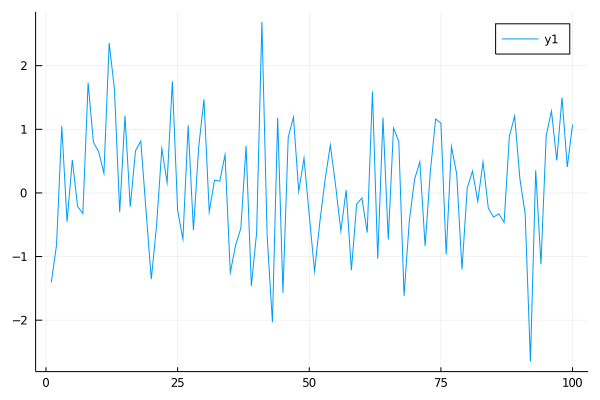

In [5]:
n = 100
ϵ = randn(n)
plot(1:n, ϵ)

In [7]:
n=100
ϵ = zeros(n)
for i in 1:n
    ϵ[i] = randn()
end

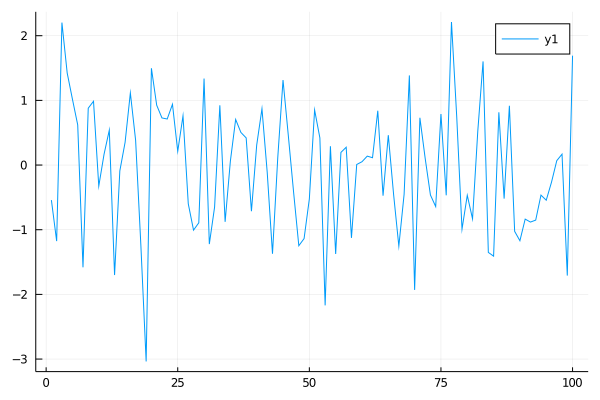

In [8]:
plot(ϵ)

In [8]:
n=100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end

In [11]:
ϵ_sum = 0.0 # careful to use 0.0 here, instead of 0
m = 5
for ϵ_val in ϵ[1:m]
ϵ_sum = ϵ_sum + ϵ_val
end
ϵ_mean = ϵ_sum / m

-0.6137228098909036

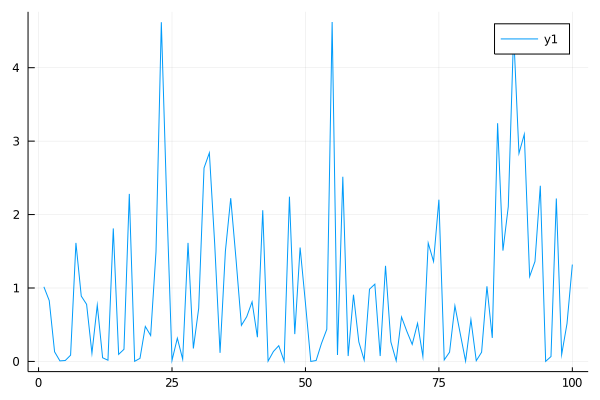

In [16]:
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2
    end
    return ϵ
end
data = generatedata(100)
plot(data)

In [17]:
mean(ϵ)

-0.07732580777441742

In [19]:
function generatedata(n)
    ϵ = rand(n)
    for i in eachindex(ϵ)
        ϵ[i] = ϵ[i]^2
    end
    return ϵ
end
data = generatedata(5)

5-element Array{Float64,1}:
 0.5361971873201411
 0.24981626816250527
 0.013417790710916195
 0.06558532951355374
 0.5775311485521748

In [22]:
function generatedata(n)
    ϵ = rand(n)
    return ϵ.^2
end
data = generatedata(5)

5-element Array{Float64,1}:
 0.02921333885600287
 0.2797926882736261
 0.08029534755260836
 0.69760431416147
 0.3085546383412316

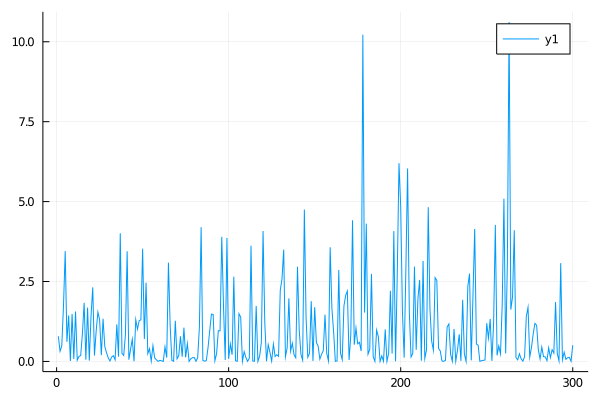

In [15]:
generatedata(n) = randn(n).^2
plot(generatedata(300))

In [27]:
gen(x) = x^2
generatedata(n) = gen.(randn(n))
data = generatedata(5)

5-element Array{Float64,1}:
 0.03403045843960027
 0.006641017903150245
 0.8355801419875272
 0.737948893217801
 0.06997025867326874

In [32]:
gener(n,gen) = gen.(randn(n))
f(x) = x^2
data = gener(5,f)

5-element Array{Float64,1}:
 0.08178359468209069
 1.2899658364638427
 0.28812011502184165
 3.4850428567052423
 0.667639179414389

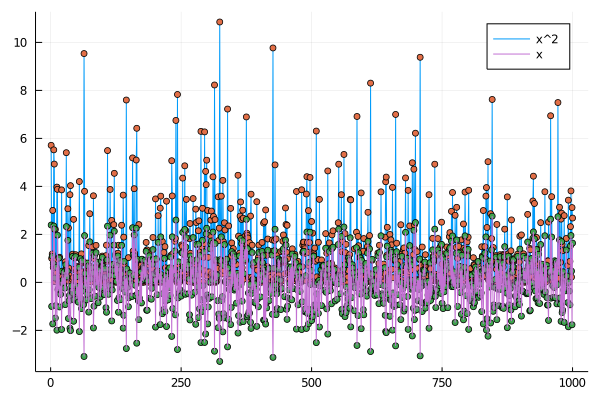

In [57]:
n=1000
f(x) = x^2
x=randn(n)
plot(f.(x), label="x^2")
scatter!(f.(x),label="")
scatter!(x,label="")

plot!(x, label="x")

In [58]:
cov(f.(x),x)

-0.10875365374794171

In [48]:
savefig("~/bt.png")

In [2]:
using Distributions, Statistics, Plots, LinearAlgebra

fixed point
$$ \mathcal{f}(\mathcal{v}) \equiv \mathcal{p}  + \beta \mathcal{v} $$
$$ f(v) = p + \beta v $$
$$ v^{*}$$

In [8]:
# Matlab style
p = 1.0 # concept = value
b = 0.9
maxiter = 1000
tolerance = 1.0E-20
v_iv = .8 # initial cond
# algorithm
v_ol = v_iv
normdiff = Inf
iter = 1 
while normdiff > tolerance && iter <= maxiter
    v_new = p + b * v_ol
    normdiff = norm(v_new - v_ol)
    v_ol = v_new
    iter = iter +1
    end 
println("Fixed point = $v_ol, and |f(x) - x| = $normdiff in $iter iteration") 

Fixed point = 9.999999999999995, and 
    |f(x) - x| = 0.0 in 330 iteration


In [9]:
function v_fp(b,r,v_iv,tol,max)
    v_ol = v_iv
    normdiff = Inf
    iter = 1
    while normdiff > tol && iter <= max
        v_new = p + b*v_ol
        normdiff = norm(v_new-v_ol)
        v_ol = v_new
        iter = iter+1
    end
    return (v_ol,normdiff,iter)
end
r= 1.0
b=0.9
max=1000
tol = 1.0E-7
v_iv=0.8
v_star,normdiff,iter = v_fp(b,r,v_iv,tol,max)
println("Fixed point = $v_star, and |f(x) - x| = $normdiff in $iter 
    iterations")

Fixed point = 9.999999173706609, and |f(x) - x| = 9.181037796679448e-8 in 155 
    iterations


In [10]:
function fixed(f,iv,tol,max)
    x_ol = iv
    normdiff = Inf
    iter =1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_ol)
        normdiff = norm(x_new-x_ol)
        x_ol = x_new
    iter = iter +1
    end
    return(x_ol,normdiff,iter)
end
f(v) = r + b*v
v_star, normdiff,iter = fixed(f,v_iv,tol,max)
println("Fixed point = $v_star, and |f(x) - x| = $normdiff in $iter 
    iterations")

Fixed point = 9.999999999999995, and |f(x) - x| = 0.0 in 330 
    iterations


In [16]:
function fixedpointmap(f, iv, tolerance=1E-7, maxiter=1000)
# setup the algorithm
x_old = iv
normdiff = Inf
iter = 1
while normdiff > tolerance && iter <= maxiter
x_new = f(x_old) # use the passed in map
normdiff = norm(x_new - x_old)
x_old = x_new
iter = iter + 1
end
return (value = x_old, normdff=normdiff, iter=iter) # A named tuple
end
sol = fixedpointmap(f, iv=0.8, tolerance=1.0E-8) # don't need to pass
println("Fixed point = $(sol.value), 
    and |f(x) - x| = $(sol.normdff)
    in $(sol.iter) iterations")

Fixed point = 9.999999918629035, 
    and |f(x) - x| = 9.041219328764782e-9
    in 177 iterations


In [21]:
#Wow only 3 iterations!!!
v -> r .+ b * v # instead of "f(v) =" 
sol = fixedpoint(f,[.8])
println("Fixed point = $(sol.zero), 
    and |f(x) - x| = $(f(sol.zero) - sol.zero)
    in $(sol.iterations) iterations")

Fixed point = [9.999999999999972], 
    and |f(x) - x| = [3.552713678800501e-15]
    in 3 iterations


In [23]:
eps() #smallest mag in Julia

2.220446049250313e-16

In [24]:
iv = [BigFloat(0.8)]
sol =fixedpoint(v->r.+b*v,iv)
sol

Results of Nonlinear Solver Algorithm
 * Algorithm: Anderson m=1 beta=1 aa_start=1 droptol=0
 * Starting Point: BigFloat[0.8000000000000000444089209850062616169452667236328125]
 * Zero: BigFloat[10.00000000000000222044604925031357388532909931412848377287867809936811555686155]
 * Inf-norm of residuals: 0.000000
 * Iterations: 3
 * Convergence: true
   * |x - x'| < 0.0e+00: true
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 3
 * Jacobian Calls (df/dx): 0

In [17]:
r = [1.0, 2.0]
b = 0.9
iv = [0.8, 2.0]
f(v) = r .+ b * v # note that p and β are used in the function!
sol = fixedpoint(f, iv )
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero)-sol.zero)) in 
    $(sol.iterations)"*"iterations")

Fixed point = [10.000000000000004, 20.000000000000014], and |f(x) - x| = 0.0 in 
    3iterations


In [26]:
r = @SVector [1.0, 2.0]
b = 0.9
iv = [0.8, 2.0]
f(v) = r .+ b * v # note that p and β are used in the function!
sol = fixedpoint(f, iv )
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero)-sol.zero)) in 
    $(sol.iterations)"*"iterations")

Fixed point = [10.000000000000004, 20.000000000000014], and |f(x) - x| = 0.0 in 
    3iterations


In [30]:
randstring(MersenneTwister(3),  6)

"4zSHdX"

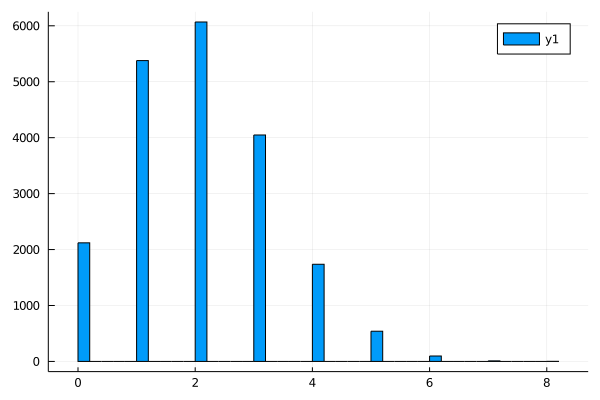

In [51]:
function binomial_rv(n, p)
count = 0
U = rand(n)
for i in 1:n
if U[i] < p
count += 1 # or count = count + 1
end
end
return count
end
experiment = 20000
b=ones(experiment)
for j in 1:experiment
b[j] = binomial_rv(10, 0.2)
end
histogram(b)

In [57]:
a=split("how are you")

3-element Array{SubString{String},1}:
 "how"
 "are"
 "you"

In [59]:
replace(a, "how"=>"what")

3-element Array{AbstractString,1}:
 "what"
 "are"
 "you"

In [61]:
split("ddd,ass,dfsd",",")

3-element Array{SubString{String},1}:
 "ddd"
 "ass"
 "dfsd"

In [67]:
match(r"(\d+)","Top 10 music starts 25")

RegexMatch("10", 1="10")

In [68]:
occursin(r"^\s*(?:#|$)", "# a comment")

true

In [76]:
match(r"^\s*(?:#|$)", "| a comment")

In [77]:
x = ("foo", 1)

("foo", 1)

In [79]:
word, val = x
println("valword = $word, val = $val")

valword = foo, val = 1


In [85]:
for i in 1:3
print(strip("$i "))
end

123

In [86]:
m = match(r"^\s*(?:#|$)", line)
if m === nothing
    println("not a comment")
else
    println("blank or comment")
end

LoadError: UndefVarError: line not defined

In [87]:
[ i + j for i in 1:3, j in 4:6 ]

3×3 Array{Int64,2}:
 5  6  7
 6  7  8
 7  8  9

In [90]:
xs = 1:100351100
f(x) = x^2
f_x = f.(xs)
sum(f_x)

686386335473937074

In [7]:
xs = 1:10000
f(x) = x^2
@btime sum([f(x) for x in $xs])
@btime sum(f.($xs))
@btime sum(f(x) for x in $xs)

  12.228 μs (4 allocations: 78.25 KiB)
  12.779 μs (7 allocations: 78.34 KiB)
  111.458 ns (2 allocations: 48 bytes)


333383335000

In [5]:
map(tuple, (1/(i+j) for i=1:2, j=1:2), [1 3; 2 4])

2×2 Array{Tuple{Float64,Int64},2}:
 (0.5, 1)       (0.333333, 3)
 (0.333333, 2)  (0.25, 4)

In [30]:
for i in 1.0:10
println("$(1+(10^-(i)) ≈ 1) for $i")
end

false for 1.0
false for 2.0
false for 3.0
false for 4.0
false for 5.0
false for 6.0
false for 7.0
true for 8.0
true for 9.0
true for 10.0


In [28]:
1 + 1E-7 ≈ 1

false

In [33]:
@show true&&false
@show true||false;

true && false = false
true || false = true


In [36]:
map(x -> sin(1 / x), randn(3))

3-element Array{Float64,1}:
 0.6874592415611186
 0.9691497096270048
 0.44716755355821086

In [57]:
    f(x)=x^2

function chisq(k)
@assert k > 0
z = randn(k)
return sum(f.(z))
end

chisq (generic function with 1 method)

In [67]:
y = [2.0, 4.0, 5.0, 6.0, 8.0]
z = similar(y)

5-element Array{Float64,1}:
 6.937819177005e-310
 6.93784003935217e-310
 6.93784242105135e-310
 6.9378401105846e-310
 5.0e-324

In [71]:
f(x, y) = [1, 2, 3] ⋅ x + y
# "⋅" can be typed by \cdot <tab>
f([3, 4, 5], 2)

28

In [75]:
# uses vector as first parameter
f.(Ref([3, 4, 5]), [2, 3])

2-element Array{Int64,1}:
 28
 29

In [77]:
xval = 0.1
yval = 2
@show (x = xval, y = yval)

(x = xval, y = yval) = (x = 0.1, y = 2)


(x = 0.1, y = 2)

In [84]:
function solvemodel(x)
a = x^2
b = 2 * a
c = a + b
return (a = a, b = b, c = c)
end
# note local scope of tuples!
solvemodel(0.1)

(a = 0.010000000000000002, b = 0.020000000000000004, c = 0.030000000000000006)

In [87]:
using Expectations, Distributions
@show d = Exponential(2.0)
f(x) = x
@show expectation(f, d);

d = Exponential(2.0) = Exponential{Float64}(θ=2.0)
expectation(f, d) = 2.0000000000000098


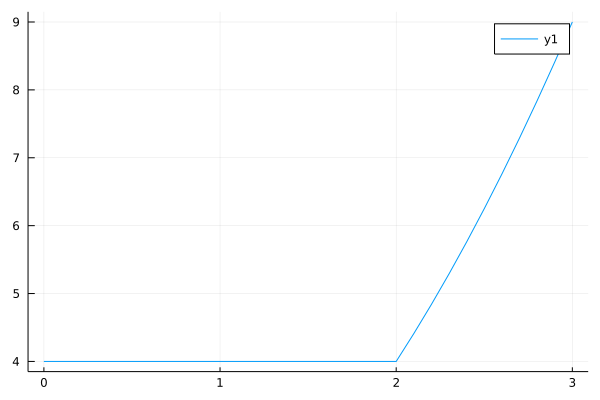

In [88]:
function snapabove(g, a)
function f(x)
if x > a
# "a" is captured in the closure f
return g(x)
else
return g(a)
end
end
return f
# closure with the embedded a
end
f(x) = x^2
h = snapabove(f, 2.0)
gr(fmt=:png);
plot(h, 0.0:0.1:3.0)

In [93]:
for i in 1:2 # introduces local i
dval1 = i
println(i)
end

1
2


In [94]:
for i in 1:2 # introduces a different local i
println(i)
end

1
2


In [95]:
dval2 = 0 # introduces variables
for i in 1:2
# introduces local i
dval2 = i # refers to outer variable
end
dval2

2

In [96]:
val = 1.0
tol = 0.002
while val > tol
old = val
val = val / 2
difference = val - old
end
@show val;

val = 0.001953125


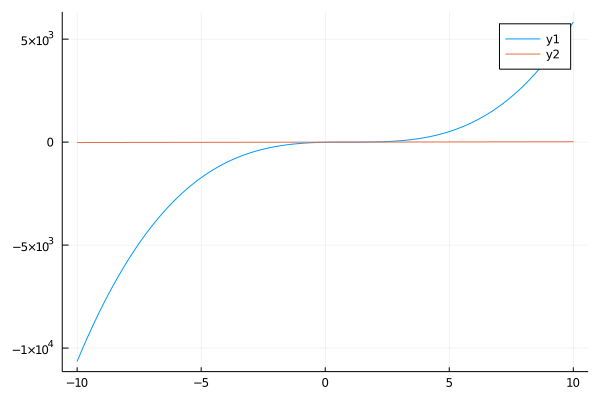

In [105]:
plot(x->(2*x-2)^3,-10.0:.01:10)
plot!(x->2x-1,-10.0:.01:10)

In [112]:
a=[1 2 4;2 3 6]

2×3 Array{Int64,2}:
 1  2  4
 2  3  6

In [109]:
ndims(a)

2

In [117]:
fill(5.0, 2, 2,2,2,2)

2×2×2×2×2 Array{Float64,5}:
[:, :, 1, 1, 1] =
 5.0  5.0
 5.0  5.0

[:, :, 2, 1, 1] =
 5.0  5.0
 5.0  5.0

[:, :, 1, 2, 1] =
 5.0  5.0
 5.0  5.0

[:, :, 2, 2, 1] =
 5.0  5.0
 5.0  5.0

[:, :, 1, 1, 2] =
 5.0  5.0
 5.0  5.0

[:, :, 2, 1, 2] =
 5.0  5.0
 5.0  5.0

[:, :, 1, 2, 2] =
 5.0  5.0
 5.0  5.0

[:, :, 2, 2, 2] =
 5.0  5.0
 5.0  5.0

In [118]:
x = Array{Float64}(undef, 2, 2)

2×2 Array{Float64,2}:
 6.93784e-310  6.93784e-310
 6.93784e-310  6.93779e-310

In [121]:
x = [1, 2, 3]
y = copy(x)
x[1] = 2
y

3-element Array{Int64,1}:
 1
 2
 3

In [123]:
x = [1, 2.0, 3]
y = similar(x, 4)

4-element Array{Float64,1}:
 6.9377921791095e-310
 6.9378400385609e-310
 6.9377921791111e-310
 0.0

In [134]:
 6.9377921791095e-310 ≈ 0


false

In [131]:
typeof(6.9377921791095e-310)

Float64

In [146]:
6.9377921791095e-310-6.00e307

-6.0e307

In [147]:
zeros(4) == [0,0,0,0]

true

In [151]:
a=[1 2 4;2 3 6]
a[2:5] .= 42

4-element view(::Array{Int64,1}, 2:5) with eltype Int64:
 42
 42
 42
 42

In [152]:
a

2×3 Array{Int64,2}:
  1  42  42
 42  42   6

In [153]:
a = [1 2; 3 4]
b = a[:, 2]
@show b
a[:, 2] = [4, 5] # modify a
@show a
@show b;

b = [2, 4]
a = [1 4; 3 5]
b = [2, 4]


In [154]:
a = [1 2; 3 4]
@views b = a[:, 2]
@show b
a[:, 2] = [4, 5]
@show a
@show b;

b = [2, 4]
a = [1 4; 3 5]
b = [4, 5]


In [155]:
@views b = a[:, 2]
view(a, :, 2) == b

true

In [156]:
view(a, :, 2)

2-element view(::Array{Int64,2}, :, 2) with eltype Int64:
 4
 5

In [250]:
a= [1 2; 3 4]
b= a' # transpose
c= Matrix(b) # convert to matrix
d= collect(b) # also `collect` works on any iterable
c== d

true

In [158]:
@show typeof(a)
@show typeof(b)
@show typeof(c)
@show typeof(d);

typeof(a) = Array{Int64,2}
typeof(b) = Adjoint{Int64,Array{Int64,2}}
typeof(c) = Array{Int64,2}
typeof(d) = Array{Int64,2}


In [170]:
c

2×2 Array{Int64,2}:
 1  3
 2  4

In [171]:
d

2×2 Array{Int64,2}:
 1  3
 2  4

In [175]:
collect(a)==d

false

In [173]:
a

2×2 Array{Int64,2}:
 1  2
 3  4

In [176]:
d = [1.0, 2.0]
a = Diagonal(d)

2×2 Diagonal{Float64,Array{Float64,1}}:
 1.0   ⋅ 
  ⋅   2.0

In [177]:
@show 2a

2a = [2.0 0.0; 0.0 4.0]


2×2 Diagonal{Float64,Array{Float64,1}}:
 2.0   ⋅ 
  ⋅   4.0

In [178]:
b = rand(2,2)
@show b * a;

b * a = [0.5477220741704156 0.6931335886415027; 0.4079433552703131 0.5199252544453907]


In [184]:
typeof(I)

UniformScaling{Bool}

In [183]:
@show a=3I

a = 3I = UniformScaling{Int64}(3)


UniformScaling{Int64}
3*I

In [185]:
x = [1 2 3]
# name `y` binds to whatever `x` bound to
y = x
z = [2 3 4]
# now dispatches the assignment of each element
y .= z
@show (x, y, z);

(x, y, z) = ([2 3 4], [2 3 4], [2 3 4])


In [196]:
function f(x)
return [1 2; 3 4] * x # matrix * column vector
end
val = [1, 2]

function g(out, x)
out .= [1 2; 3 4] * x
end
g(val, val)
val

2-element Array{Int64,1}:
  5
 11

In [194]:
[1 2; 3 4]*[1,2]

2-element Array{Int64,1}:
  5
 11

In [206]:
y = [1 2]
y .-= 2

1×2 Array{Int64,2}:
 -1  0

In [208]:
x = 5

5

In [201]:
x -= 2

LoadError: syntax: extra token "2" after end of expression

In [214]:
x = 2
function f(x)
# MISTAKE! does not modify x, creates a new value!
x = 3
end
f(x)
@show x;

x = 2


In [220]:
x=[3]
typeof(x)

Array{Int64,1}

In [217]:
y = 3

3

In [221]:
x==collect(y)


false

In [222]:
typeof(collect(y))

Array{Int64,0}

In [223]:
collect(y)

0-dimensional Array{Int64,0}:
3

In [224]:
xdynamic = [1, 2]
xstatic = @SVector [1, 2]
# turns it into a highly optimized static vector
f(x) = 2x
@show f(xdynamic)
@show f(xstatic)

f(xdynamic) = [2, 4]
f(xstatic) = [2, 4]


2-element SArray{Tuple{2},Int64,1,2} with indices SOneTo(2):
 2
 4

In [232]:
function g(x)
x .= 2x
return "Success!"
end
@show xdynamic
@show g(xdynamic)
@show xdynamic
# @show g(xstatic) fail!
@show xstatic;


xdynamic = [16, 32]
g(xdynamic) = "Success!"
xdynamic = [32, 64]
xstatic = [1, 2]


In [260]:
a = [-1, 0, 1]
typeof(a)

Array{Int64,1}

In [255]:
@show size(a)
@show length(a)
@show ndims(a)
@show sum(a)
@show mean(a)
@show std(a)
@show var(a)
@show maximum(a)
@show minimum(a)
@show extrema(a);

size(a) = (3,)
length(a) = 3
ndims(a) = 1
sum(a) = 0
mean(a) = 0.0
std(a) = 1.0
var(a) = 1.0
maximum(a) = 1
minimum(a) = -1
extrema(a) = (-1, 1)


In [261]:
b = sort(a, rev = true)
a == b

false

In [262]:
b = sort!(a, rev = true)
a == b

true

In [278]:
a = ones(1, 2)
b= ones(2,2)

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

In [276]:
b*a'

2×1 Array{Float64,2}:
 2.0
 2.0

In [280]:
A=[1 2;3 5]

2×2 Array{Int64,2}:
 1  2
 3  5

In [281]:
A \ b

2×2 Array{Float64,2}:
 -3.0  -3.0
  2.0   2.0

In [282]:
inv(A)*b

2×2 Array{Float64,2}:
 -3.0  -3.0
  2.0   2.0

In [287]:
ones(2)'*ones(2)

2.0

In [285]:
ones(2)'⋅ones(2)

2.0

In [288]:
dot(ones(2),ones(2))

2.0

In [291]:
a=randn(10)
a[a.>0]

6-element Array{Float64,1}:
 1.9467227754444627
 1.1536817223521865
 0.18263791948831076
 1.1434662742523547
 1.330608609419601
 1.157093048178314

In [299]:
a=[1 2 3 4]
sizeof(a)

32

In [298]:
dropdims(a, dims = 1)
sizeof(a)

32

In [293]:
typeof(a')

Adjoint{Int64,Array{Int64,2}}

In [294]:
a'

4×1 Adjoint{Int64,Array{Int64,2}}:
 1
 2
 3
 4

In [301]:
a=Matrix(a')

4×1 Array{Int64,2}:
 1
 2
 3
 4

In [303]:
dropdims(a,dims=2)

4-element Array{Int64,1}:
 1
 2
 3
 4

In [305]:
[log(x) for x in 1:4]

4-element Array{Float64,1}:
 0.0
 0.6931471805599453
 1.0986122886681098
 1.3862943611198906

In [308]:
log.(1:4)

4-element Array{Float64,1}:
 0.0
 0.6931471805599453
 1.0986122886681098
 1.3862943611198906

In [313]:
A[2,2]=4
A

2×2 Array{Int64,2}:
 1  2
 3  4

In [315]:
eigvals(A) == eigvals(A')

true

In [317]:
rank(A)

2

In [318]:
ndims(A)

2

In [319]:
sizeof(A)

32

In [320]:
size(A)

(2, 2)

In [321]:
length(A)

4

In [322]:
a= 10:12

10:12

In [327]:
typeof(a)

StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}

In [324]:
@show Vector(a)

Vector(a) = [10, 11, 12]


3-element Array{Int64,1}:
 10
 11
 12

In [325]:
b = Diagonal([1.0, 2.0, 3.0])
b * a .- [1.0; 2.0; 3.0]

3-element Array{Float64,1}:
  9.0
 20.0
 33.0

In [326]:
a = 0.0:0.1:1.0

0.0:0.1:1.0

In [329]:
maxval = 1.0
minval = 0.0
numpoints = 10
a = range(minval, maxval, 
    length=numpoints)
maximum(a) == maxval

true

In [330]:
a = zeros(10)
Threads.@threads for i = 1:10
           a[i] = Threads.threadid()
       end

In [332]:
Threads.nthreads()

1

In [333]:
julia --threads 4

LoadError: syntax: invalid operator "--"

In [341]:
t = (val1 = 1.0, val2 = "test")
t.val1

1.0

In [343]:
println("val1 = $(t.val1) and
    val2 = $(t.val2)")
# access by name

val1 = 1.0 and
    val2 = test


In [344]:
t2 = (val3 = 4, val4 = "test!!")
t3 = merge(t, t2)

(val1 = 1.0, val2 = "test", val3 = 4, val4 = "test!!")

In [345]:
function f(parameters)
α, β = parameters.α, parameters.β
return α + β
end
parameters = (α = 0.1, β = 0.2)
f(parameters)

0.30000000000000004

In [348]:
function f(parameters)
@unpack α, β = parameters
return α + β
end
# good style, less sensitive to errors
parameters = (α = 0.1, β = 0.2)
f(parameters)

0.30000000000000004

In [349]:
paramgen = @with_kw (α = 0.1, β = 0.2)
# create named tuples with defaults
# creates named tuples, replacing defaults
@show paramgen() # calling without arguments gives all defaults
@show paramgen(α = 0.2)
@show paramgen(α = 0.2, β = 0.5);

paramgen() = (α = 0.1, β = 0.2)
paramgen(α = 0.2) = (α = 0.2, β = 0.2)
paramgen(α = 0.2, β = 0.5) = (α = 0.2, β = 0.5)


In [358]:
function f(y)
x = nothing
if y > 0.0
# calculations to set `x`
x = y
end
# later, can check `x`
if isnothing(x)
println("x was not set")
else
println("x = $x")
end
x
end
#@show f(1.0)
#@show 
f(-1.0)

x was not set


In [361]:
function f(x)
if x > 0.0
return sqrt(x)
else
return nothing
end
end
x1 = 1.0
x2 = -1.0
y1 = f(x1)
y2 = f(x2)
if isnothing(y1)
println("f($x2) successful")
else
println("f($x2) failed");
end

f(-1.0) failed


In [364]:
function f(x)
x > 0.0 ? sqrt(x) : nothing
end
# the "a ? b : c" pattern is the ternary
f(1.0)

1.0

In [365]:
x = [1.0, nothing]

2-element Array{Union{Nothing, Float64},1}:
 1.0
  nothing

In [366]:
x = [0.1, -1.0, 2.0, -2.0]
y = f.(x)

4-element Array{Union{Nothing, Float64},1}:
 0.31622776601683794
  nothing
 1.4142135623730951
  nothing

In [367]:
function f(x)
@assert x > 0.0
sqrt(x)
end
f(2.0)

1.4142135623730951

In [368]:
function f(x; z = nothing)
if isnothing(z)
println("No z given with $x")
else
println("z = $z given with $x")
end
end
f(1.0)
f(1.0, z=3.0)

No z given with 1.0
z = 3.0 given with 1.0


In [393]:
function f(x)
if x > 0.0
return (x)
else
return NaN #NaN similar
 #to nothing, but different type
end
end
f(-1)

NaN

In [394]:
f(0.1)

0.1

In [396]:
@show typeof(f(-1))
@show f(-1) == NaN # note, this fails!
@show isnan(f(-1)); # check with this

typeof(f(-1)) = Float64
f(-1) == NaN = false
isnan(f(-1)) = true


In [385]:
try sqrt(-1.0); catch err; err end

DomainError(-1.0, "sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).")

In [400]:
try convert(Int64, 3.12); catch err; 
    err end

InexactError(:Int64, Int64, 3.12)

In [403]:
function f(x)
try
sqrt(x)
catch err
sqrt(complex(x))
end
    end
f(0.0)

0.0

In [402]:
f(-1.0)

0.0 + 1.0im

In [404]:
x = [3.0, missing, 5.0, missing, missing]

5-element Array{Union{Missing, Float64},1}:
 3.0
  missing
 5.0
  missing
  missing

In [405]:
typeof(Missing)

DataType

In [411]:
f(x) = x^2

@show missing + 1.0
# @show nothing + 1.0 -> error occurs
@show missing * 2
@show missing * "test"
@show f(missing)
# @show f(x) -> error occurs
# @show mean(missing) -> error occurs
@show mean(x);

missing + 1.0 = missing
missing * 2 = missing
missing * "test" = missing
f(missing) = missing


LoadError: MethodError: no method matching ^(::Array{Union{Missing, Float64},1}, ::Int64)
Closest candidates are:
  ^(!Matched::BigFloat, ::Union{Int16, Int32, Int64, Int8}) at mpfr.jl:587
  ^(!Matched::BigFloat, ::Integer) at mpfr.jl:599
  ^(!Matched::Float32, ::Integer) at math.jl:907
  ...

In [412]:
x = missing
@show x == missing
@show x === missing # an exception
@show ismissing(x); # 이걸로 확인

x == missing = missing
x === missing = true
ismissing(x) = true


In [413]:
x = [1.0, missing, 2.0, missing, 
    missing, 5.0]
@show mean(x)
@show mean(skipmissing(x))
@show coalesce.(x, 0.0);

mean(x) = missing
mean(skipmissing(x)) = 2.6666666666666665
coalesce.(x, 0.0) = [1.0, 0.0, 2.0, 0.0, 0.0, 5.0]


In [422]:
using NLsolve
S_iv = [22.0 31;31 22];

Σ = [.5 .4;.4 .6]
A = [.8 -.2; -.1 .7]
Q = Σ*Σ'
@btime sol=fixedpoint(S-> A*S*A' + Q, S_iv)
sol

  8.964 μs (87 allocations: 7.33 KiB)


Results of Nonlinear Solver Algorithm
 * Algorithm: Anderson m=4 beta=1 aa_start=1 droptol=0
 * Starting Point: [2.0 3.0; 3.0 2.0]
 * Zero: [0.6712314073226523 0.6334739702517188; 0.6334739702517195 0.8588744279176184]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 0

In [428]:
using Base: show_supertypes
# import the function from 
#the `Base` package

In [429]:
show_supertypes(Int64)

Int64 <: Signed <: Integer <: Real <: Number <: Any

In [430]:
show_supertypes(Array)

LoadError: MethodError: no method matching show_supertypes(::Type{Array})
Closest candidates are:
  show_supertypes(!Matched::IO, !Matched::DataType) at show.jl:622
  show_supertypes(!Matched::DataType) at show.jl:630

In [432]:
@show subtypes(Real)
@show subtypes(AbstractFloat);

subtypes(Real) = Any[AbstractFloat, AbstractIrrational, FixedPointNumbers.FixedPoint, ForwardDiff.Dual, Integer, Rational, StatsBase.TestStat]
subtypes(AbstractFloat) = Any[BigFloat, Float16, Float32, Float64]


In [434]:
function f(x, A)
b = [5.0, 6.0]
return A * x + b
end
val = f([0.1, 2.0], [1.0 2.0; 3.0 4.0])

2-element Array{Float64,1}:
  9.1
 14.3

In [435]:
@show f([0.1; 2.0], [1 2; 3 4])
@show f([0.1; 2.0], Diagonal([1.0, 2.0]))

f([0.1; 2.0], [1 2; 3 4]) = [9.1, 14.3]
f([0.1; 2.0], Diagonal([1.0, 2.0])) = [5.1, 10.0]


2-element Array{Float64,1}:
  5.1
 10.0

In [436]:
struct FooNotTyped # immutable by default, use `mutable struct` otherwise
a # BAD! not typed
b
c
end

In [437]:
struct Foo
a::Float64
b::Int64
c::Vector{Float64}
end

In [439]:
foo_nt = FooNotTyped(2.0, 3, [1.0, 
        2.0, 3.0]) # new `FooNotTyped`
foo = Foo(2.0, 3, [1.0, 2.0, 3.0]) # creates a new `Foo`
@show typeof(foo)
@show foo.a # get the value for a field
@show foo.b
@show foo.c;

typeof(foo) = Foo
foo.a = 2.0
foo.b = 3
foo.c = [1.0, 2.0, 3.0]


In [440]:
typeof(foo_nt)

FooNotTyped

In [441]:
struct Foo2
a::Float64
b::Integer # BAD! Not a concrete type
c::Vector{Real} # BAD! Not a concrete type
end

In [442]:
f(x) = x.a + x.b + sum(x.c) # use the type
a = 2.0
b = 3
c = [1.0, 2.0, 3.0]
foo = Foo(a, b, c)
@show f(foo) # call with the foo, no problem
# some other typed for the values
a =2 # not a floating point but `f()` would work
b =3
c= [1.0, 2.0, 3.0]' # transpose is not a `Vector` but `f()` would work
# foo = Foo(a, b, c) fails to compile
# works with `NotTyped` version, 
# but low performance
foo_nt = FooNotTyped(a, b, c)
@show f(foo_nt);

f(foo) = 11.0
f(foo_nt) = 11.0


In [443]:
struct Foo3{T1, T2, T3}
a::T1
# could be any type
b::T2
c::T3
end
# works fine
a = 2
b = 3
c = [1.0, 2.0, 3.0]'
foo = Foo3(a, b, c)
@show typeof(foo)
f(foo)

typeof(foo) = Foo3{Int64,Int64,Adjoint{Float64,Array{Float64,1}}}


11.0

In [445]:
struct Foo4{T1 <: Real, T2 <: Real, T3 <: AbstractVecOrMat{<:Real}}
a::T1
b::T2
c::T3 # should check dimensions as well
end
foo = Foo4(a, b, c) # no problem, and high performance
@show typeof(foo)
f(foo)

typeof(foo) = Foo4{Int64,Int64,Adjoint{Float64,Array{Float64,1}}}


11.0

In [449]:
using Parameters
@with_kw struct Foo5
a::Float64 = 2.0
b::Int64
c::Vector{Float64}
end
# adds default value
foo = Foo5(a = 0.1, b = 2, 
    c = [1.0, 2.0, 3.0])
foo2 = Foo5(c = [1.0, 2.0, 3.0], 
    b = 2) 
# rearrange order, uses default values
@show foo
@show foo2
function f(x)
@unpack a, b, c = x
return a + b + sum(c)
end
# can use `@unpack` on any struct
f(foo)

foo = Foo5
  a: Float64 0.1
  b: Int64 2
  c: Array{Float64}((3,)) [1.0, 2.0, 3.0]

foo2 = Foo5
  a: Float64 2.0
  b: Int64 2
  c: Array{Float64}((3,)) [1.0, 2.0, 3.0]



8.1

In [450]:
f(foo2)

10.0

In [460]:
# BAD
x = [5.0, 6.0, 2.1]
function g(x::Array{Float64, 1})
# not generic!
y = zeros(length(x))
# not generic, hidden float!
    z = Diagonal(ones(length(x)))
q = ones(length(x))
y .= z * x + q
return y
# not generic, hidden float!
end
g(x)

In [456]:
# GOOD
function g2(x) # or `x::AbstractVector`
y = similar(x)
z = I
q = ones(eltype(x), length(x)) # or `fill(one(x), length(x))`
y .= z * x + q
return y
end
g2(x)

3-element Array{Float64,1}:
 6.0
 7.0
 3.1

In [457]:
function g(x)
y = similar(x)
for i in eachindex(x)
y[i] = x[i]^2 # could broadcast

end
return y
end
g([BigInt(1), BigInt(2)])

2-element Array{BigInt,1}:
 1
 4

In [458]:
@show typeof([1.0, 2.0, 3.0])
@show eltype([1.0, 2.0, 3.0]);

typeof([1.0, 2.0, 3.0]) = Array{Float64,1}
eltype([1.0, 2.0, 3.0]) = Float64


In [459]:
@show typeof(ones(3))
@show typeof(ones(Int64, 3))
@show typeof(zeros(3))
@show typeof(zeros(Int64, 3));

typeof(ones(3)) = Array{Float64,1}
typeof(ones(Int64, 3)) = Array{Int64,1}
typeof(zeros(3)) = Array{Float64,1}
typeof(zeros(Int64, 3)) = Array{Int64,1}


In [471]:
@show typeof(1)
@show typeof(1.0)
@show typeof(BigFloat(1.0))
@show typeof(one(BigFloat))
# gets multiplicative identity, 
# passing in type
typeof(zero(BigFloat))
x = BigFloat(2)
@show typeof(one(x)) # can call with a variable for convenience
@show typeof(zero(x));

typeof(1) = Int64
typeof(1.0) = Float64
typeof(BigFloat(1.0)) = BigFloat
typeof(one(BigFloat)) = BigFloat
typeof(one(x)) = BigFloat
typeof(zero(x)) = BigFloat


In [472]:
function g(x::AbstractFloat)
return x + 1.0
# assumes `1.0` can be converted to 
# something compatible with 'typeof(x)`
end
x = BigFloat(1.0)
@show typeof(g(x));

typeof(g(x)) = BigFloat


In [475]:
#Bad
function g2(x::AbstractFloat)
if x > 0.0
# can't efficiently call with 
#`x::Integer`
return x + 1.0
# OK - assumes you can promote 
#`Float64` to `AbstractFloat`
    else
return 0
# BAD! Returns a `Int64`
end
end
x = BigFloat(1.0)
x2 = BigFloat(-1.0)
@show typeof(g2(x))
@show typeof(g2(x2));

typeof(g2(x)) = BigFloat
typeof(g2(x2)) = Int64


In [477]:
# GOOD
function g3(x) #
if x > zero(x)
# any type with an additive identity
return x + one(x) # more general but less important of a change
    else
return zero(x)
end
end
@show typeof(g3(x))
@show typeof(g3(x2));
# type stable

typeof(g3(x)) = BigFloat
typeof(g3(x2)) = BigFloat


In [478]:
function ourabs(x::Real)
if x > zero(x)
# note, not 0!
return x
else
return -x
end
end
function ourabs(x::Complex)
sqrt(real(x)^2 + imag(x)^2)
end
@show ourabs(-1)
# `Int64`
@show ourabs(-1.0) # `Float64`
@show ourabs(1.0 - 2.0im); 
# `Complex{Float64}`

ourabs(-1) = 1
ourabs(-1.0) = 1.0
ourabs(1.0 - 2.0im) = 2.23606797749979


In [8]:
x = range(0.0, 1.0, length = 20)
x_2 = 1:1:20
# if integers
@show typeof(x)
@show typeof(x_2)
@show supertype(typeof(x));

typeof(x) = StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}
typeof(x_2) = StepRange{Int64,Int64}
supertype(typeof(x)) = AbstractRange{Float64}


In [480]:
show_supertypes(typeof(x))

StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}} <: AbstractRange{Float64} <: AbstractArray{Float64,1} <: Any

In [481]:
show_supertypes(typeof(x_2))

StepRange{Int64,Int64} <: OrdinalRange{Int64,Int64} <: AbstractRange{Int64} <: AbstractArray{Int64,1} <: Any

In [482]:
@show typeof(x) <: AbstractRange
@show typeof(x_2) <: AbstractRange;

typeof(x) <: AbstractRange = true
typeof(x_2) <: AbstractRange = true


In [9]:
f(x) = x^2
f_x = f.(x)
# calculating at the range values
@show typeof(f_x)
@show supertype(typeof(f_x))
@show supertype(supertype(typeof(f_x)))
@show length(f_x);
# and many more

typeof(f_x) = Array{Float64,1}
supertype(typeof(f_x)) = DenseArray{Float64,1}
supertype(supertype(typeof(f_x))) = AbstractArray{Float64,1}
length(f_x) = 20


In [10]:
slopes(f_x::AbstractVector, 
    x::AbstractRange) = 
    diff(f_x) / step(x)

slopes (generic function with 1 method)

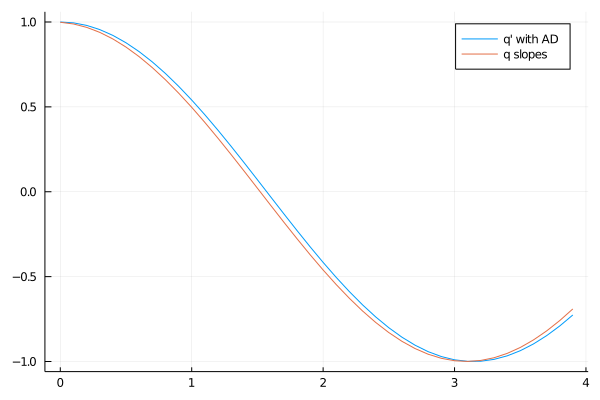

In [11]:
using Plots, ForwardDiff
gr(fmt = :png);
# operator to get the derivative of
# this function using AD
D(f) = x -> 
      ForwardDiff.derivative(f, x)
# compare slopes with AD for sin(x)
q(x) = sin(x)
x = 0.0:0.1:4.0
q_x = q.(x)
q_slopes_x = slopes(q_x, x)
D_q_x = D(q).(x)
# broadcasts AD across vector
plot(x[1:end-1], D_q_x[1:end-1], label = "q' with AD")
plot!(x[1:end-1], q_slopes_x, label = "q slopes")

In [14]:
slopes(f::Function, x::AbstractRange)= diff(f.(x))/step(x) # broadcast ftn
@show typeof(q) <: Function
@show typeof(x) <: AbstractRange
q_slopes_x = slopes(q, x)
# use slopes(f::Function, x)
@show q_slopes_x[1]; 
#error

typeof(q) <: Function = true
typeof(x) <: AbstractRange = true
q_slopes_x[1] = 0.9983341664682815


In [15]:
slopes(f::Function, x::AbstractArray)= 
diff(f.(x)) ./ diff(x)
x_array = Array(x) # convert range to array
@show typeof(x_array) <: AbstractArray
q_slopes_x = slopes(q, x_array)
@show q_slopes_x[1];

typeof(x_array) <: AbstractArray = true
q_slopes_x[1] = 0.9983341664682815


In [17]:
f(x) = x^2
value, accuracy = quadgk(f, 0.0, 1.0)

(0.3333333333333333, 5.551115123125783e-17)

In [20]:
function f(a, b; N = 50)
r = range(a, b, length=N) # one
return mean(r)
end
Df(x) = ForwardDiff.derivative(y -> f(0.0, y), x)
@show f(0.0, 3.0)
@show f(0.0, 3.1)
Df(3.0) # ???

f(0.0, 3.0) = 1.5
f(0.0, 3.1) = 1.55


0.5

In [21]:
x = 1
y = Normal()
z = "foo"
@show x, y, z
@show typeof(x), typeof(y), typeof(z)
@show supertype(typeof(x))
# pipe operator, |>, is is equivalent
@show typeof(x) |> supertype
@show supertype(typeof(y))
@show typeof(z) |> supertype
@show typeof(x) <: Any;

(x, y, z) = (1, Normal{Float64}(μ=0.0, σ=1.0), "foo")
(typeof(x), typeof(y), typeof(z)) = (Int64, Normal{Float64}, String)
supertype(typeof(x)) = Signed
typeof(x) |> supertype = Signed
supertype(typeof(y)) = Distribution{Univariate,Continuous}
typeof(z) |> supertype = AbstractString
typeof(x) <: Any = true


In [22]:
using Base: show_supertypes
# import the function from the `Base` package
show_supertypes(Int64)

Int64 <: Signed <: Integer <: Real <: Number <: Any

In [23]:
subtypes(Integer)

6-element Array{Any,1}:
 ArrayInterface.StaticInt
 Bool
 GeometryBasics.OffsetInteger
 GeometryTypes.OffsetInteger
 Signed
 Unsigned

In [24]:
function subtypetree(t, level=1, indent=4)
if level == 1
println(t)
end
for s in subtypes(t)
println(join(fill(" ", level * indent))
            * string(s)) # print type
subtypetree(s, level+1, indent) 
# recursively print the next type,
        # indenting
end
end

subtypetree (generic function with 3 methods)

In [27]:
subtypetree(Number)

Number
    Complex
    Real
        AbstractFloat
            BigFloat
            Float16
            Float32
            Float64
        AbstractIrrational
            Irrational
        FixedPointNumbers.FixedPoint
            FixedPointNumbers.Fixed
            FixedPointNumbers.Normed
        ForwardDiff.Dual
        Integer
            ArrayInterface.StaticInt
            Bool
            GeometryBasics.OffsetInteger
            GeometryTypes.OffsetInteger
            Signed
                BigInt
                Int128
                Int16
                Int32
                Int64
                Int8
            Unsigned
                UInt128
                UInt16
                UInt32
                UInt64
                UInt8
        Rational
        Ratios.SimpleRatio
        StatsBase.TestStat


In [29]:
struct MyType
a::Float64
end
myval= MyType(2.0)
@show myval
@show typeof(myval)
@show supertype(typeof(myval))
@show typeof(myval) <: Any;

myval = MyType(2.0)
typeof(myval) = MyType
supertype(typeof(myval)) = Any
typeof(myval) <: Any = true


In [30]:
import Base.show
# to extend an existing function
function show(io::IO, x::MyType)
str = "(MyType.a = $(x.a))" 
# custom display
print(io, str)
end
show(myval)

(MyType.a = 2.0)

In [32]:
typeof(IO)

DataType

In [45]:
mutable struct MyModel
a::Float64
b::Float64
algorithmcalculation::Float64
MyModel(a, b) = new(a, b, 0.0) 
    # an inner constructor
MyModel(a) = new(a,0.0,0.0)
    # an inner constructor
end
@show MyModel(1,2)
@show MyModel(1);

MyModel(1, 2) = MyModel(1.0, 2.0, 0.0)
MyModel(1) = MyModel(1.0, 0.0, 0.0)


MyModel(1.0, 0.0, 0.0)

In [41]:
function myalgorithm!(m::MyModel, x)
m.algorithmcalculation = m.a + m.b + x # some algorithm
end
function set_a!(m::MyModel, a)
m.a = a
end
m = MyModel(2.0, 3.0)
x = 0.1
set_a!(m, 4.1)
myalgorithm!(m, x)
@show m.algorithmcalculation
@show m
@show typeof(m);

m.algorithmcalculation = 7.199999999999999
m = MyModel(4.1, 3.0, 7.199999999999999)
typeof(m) = MyModel


In [46]:
d1 = Normal(1.0, 2.0) # an example type to explore
@show d1
show_supertypes(typeof(d1))

d1 = Normal{Float64}(μ=1.0, σ=2.0)
Normal{Float64} <: Distribution{Univariate,Continuous} <: Sampleable{Univariate,Continuous} <: Any

In [47]:
@show rand(d1);

rand(d1) = 1.877813063226899


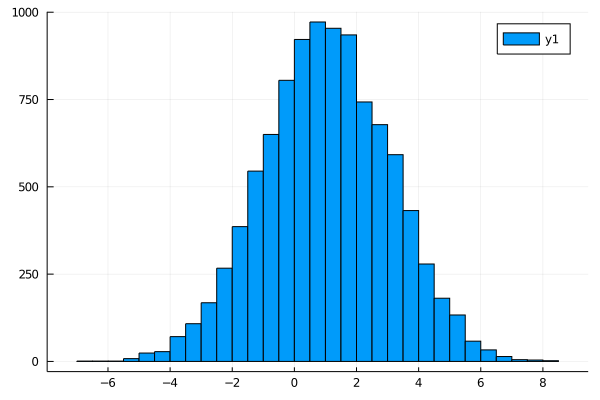

In [55]:
histogram(rand(d1,10000)) 

In [59]:
# sim x(t+1) = ax(t) + bε(t+1) where ε ∼ D
function simulateprocess(x_; a = 1.0, 
        b = 1.0, N = 5,
d::Sampleable{Univariate,Continuous})
x = zeros(typeof(x_), N+1) 
# preallocate vector, careful on
# the type
x[1] = x_
for t in 2:N+1
x[t] = a * x[t-1] + b * rand(d) # draw
end
return x
end
@show simulateprocess(0.0, d=Normal(0.2, 2.0));

simulateprocess(0.0, d = Normal(0.2, 2.0)) = [0.0, 3.1688080736463133, 3.7818568899286307, 1.424091124610519, -0.06643252958636237, 0.9183822862205744]


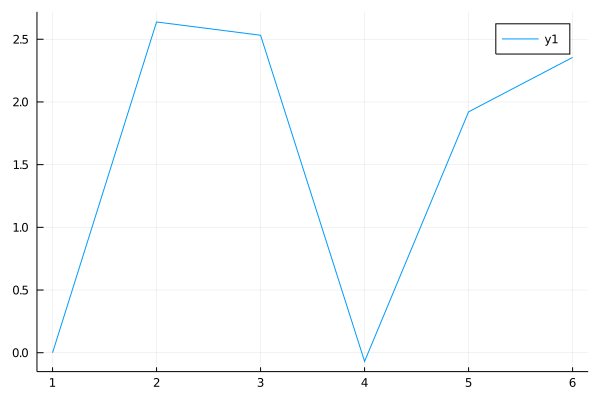

In [63]:
plot(simulateprocess(0.0, d=Normal(0.2, 2.0)))

In [65]:
d1 = Normal(1.0, 2.0)
d2 = Exponential(0.1)
@show mean(d2)
@show d1
@show d2
@show supertype(typeof(d1))
@show supertype(typeof(d2))
@show pdf(d1, 0.1)
@show pdf(d2, 0.1)
@show cdf(d1, 0.1)
@show cdf(d2, 0.1)
@show support(d1)
@show support(d2)
@show minimum(d1)
@show minimum(d2)
@show maximum(d1)
@show maximum(d2);

mean(d2) = 0.1
d1 = Normal{Float64}(μ=1.0, σ=2.0)
d2 = Exponential{Float64}(θ=0.1)
supertype(typeof(d1)) = Distribution{Univariate,Continuous}
supertype(typeof(d2)) = Distribution{Univariate,Continuous}
pdf(d1, 0.1) = 0.18026348123082397
pdf(d2, 0.1) = 3.6787944117144233
cdf(d1, 0.1) = 0.32635522028792
cdf(d2, 0.1) = 0.6321205588285577
support(d1) = RealInterval(-Inf, Inf)
support(d2) = RealInterval(0.0, Inf)
minimum(d1) = -Inf
minimum(d2) = 0.0
maximum(d1) = Inf
maximum(d2) = Inf


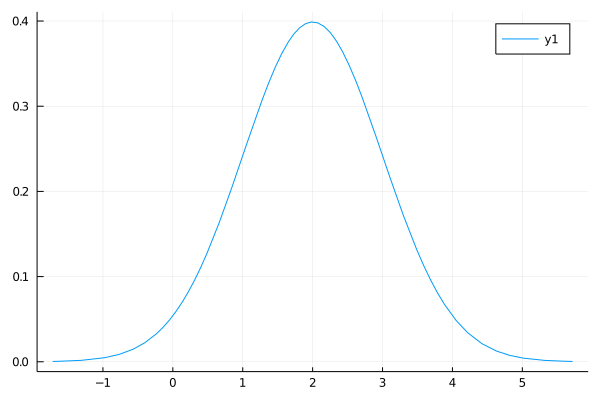

In [68]:
d = Normal(2.0, 1.0)
plot(d)

In [70]:
struct OurTruncatedExponential <: 
    Distribution{Univariate,Continuous}
α::Float64
xmax::Float64
end
Distributions.pdf(d::
    OurTruncatedExponential, x) = 
d.α *exp(-d.α * x)/exp(-d.α * d.xmax)
Distributions.minimum(d::OurTruncatedExponential) = 0
Distributions.maximum(d::OurTruncatedExponential) = d.xmax
# ... more to have a complete type

In [72]:
d = OurTruncatedExponential(1.0,2.0)
@show minimum(d), maximum(d)
@show support(d);

(minimum(d), maximum(d)) = (0, 2.0)
support(d) = RealInterval(0.0, 2.0)


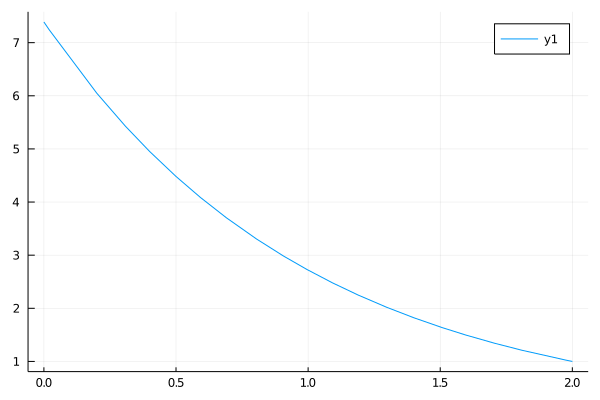

In [73]:
plot(d)

typeof(d) = Truncated{Exponential{Float64},Continuous,Float64}


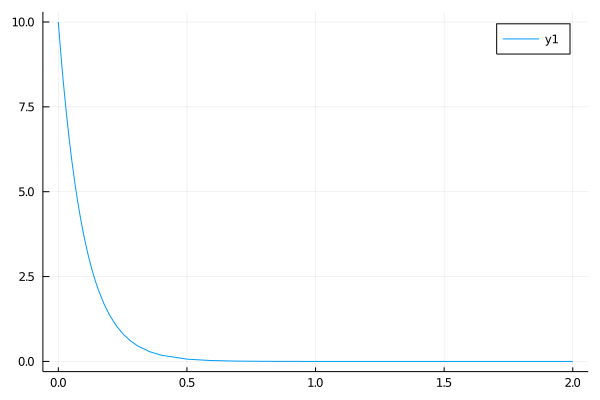

In [77]:
d = Truncated(Exponential(0.1), 0.0,
    2.0)
@show typeof(d)
 plot(d)
# support(d)

In [78]:
x = 4.0 + 1.0im
@show x, typeof(x)
xbig = BigFloat(4.0) + 1.0im
@show xbig, typeof(xbig);

(x, typeof(x)) = (4.0 + 1.0im, Complex{Float64})
(xbig, typeof(xbig)) = (4.0 + 1.0im, Complex{BigFloat})


In [81]:
@which +(x,x)

+(z::Complex, w::Complex) in Base at complex.jl:275

In [82]:
@which abs(x)

abs(z::Complex) in Base at complex.jl:264

In [83]:
@show Float64 <: AbstractFloat
@show BigFloat <: AbstractFloat
@show eps(Float64)
@show eps(BigFloat);

Float64 <: AbstractFloat = true
BigFloat <: AbstractFloat = true
eps(Float64) = 2.220446049250313e-16
eps(BigFloat) = 1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77


In [85]:
@which isless(1, 2)

isless(x::Real, y::Real) in Base at operators.jl:355

In [89]:
isless(1.0, 2.0) 

true

In [87]:
# applied to two floats
@which isless(1.0, 2.0)

isless(x::Float64, y::Float64) in Base at float.jl:465

No documentation found.

Binding `normal` does not exist.


In [105]:
f(x) = x*exp(-1.0*x)
@show quadgk(f, 0.0, 10.0)

quadgk(f, 0.0, 10.0) = (0.9995006007726126, 2.1034363348326757e-9)


(0.9995006007726126, 2.1034363348326757e-9)

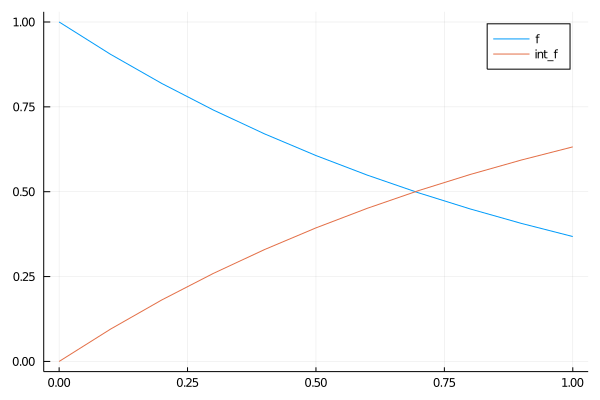

In [102]:
# integral
function plotfunctions(f)
intf(x) = quadgk(f, 0.0, x)[1]
# int_0^x f(x) dx
x = 0:0.1:1.0
f_x = f.(x)
plot(x, f_x, label="f")
plot!(x, intf.(x), label="int_f")
end
plotfunctions(f)

p = Polynomial(2 - 5*x + 2*x^2)
p(1.0) = -1.0


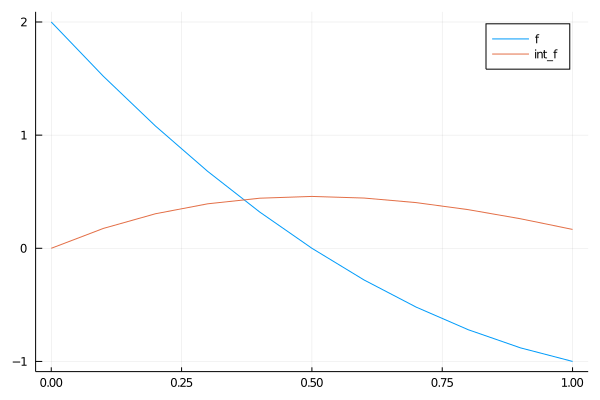

In [108]:
p = Polynomial([2, -5, 2], :x)
@show p
@show p(1.0) # call like a function
plotfunctions(p)


f_int(1.0) = 1.0


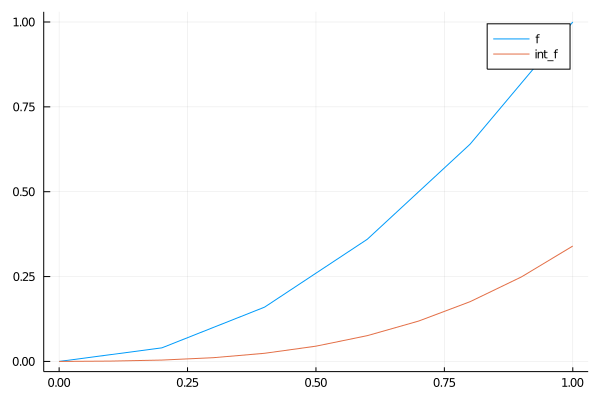

In [112]:
x = 0.0:0.2:1.0
f(x) = x^2
f_int = LinearInterpolation(x, f.(x)) # interpolates the coarse grid
@show f_int(1.0) # call like a function
plotfunctions(f_int)

In [122]:
@show value, 
tol = quadgk(sin, -2π, 2π)
@show value, 
tol = quadgk(tan, -2π, 2π);
# poor approx, only good for smooth
# function, and poor for iteration

(value, tol) = quadgk(sin, -2π, 2π) = (5.685556192513985e-16, 0.0)
(value, tol) = quadgk(tan, -2π, 2π) = (7.575443204229487, 1.2694122272440516)


In [129]:
x, w = gausslegendre( 100_000 ); 
# i.e. find 100,000 nodes 
# w for weight
f(x) = x^2
@show w⋅f.(x);
# integrates f(x) = x^2 from -1 to 1
# default domain

w ⋅ f.(x) = 0.6666666666666666


In [125]:
@show w⋅sin.(x)

w ⋅ sin.(x) = -4.440892098500626e-16


-4.440892098500626e-16

In [126]:
x, w = qnwlege(65, -2π, 2π);
@show w ⋅ cos.(x);

w ⋅ cos.(x) = -2.9819896552041314e-15


In [132]:
dist = Normal()
E = expectation(dist)
f(x) = x
@show E(f) #i.e. identity

E(f) = -4.052286867506662e-18


-4.052286867506662e-18

In [144]:
# Or using as a linear operator
f(x) = x^2
x = nodes(E)
w = weights(E)
@show E(f)
@show E * f.(x) 
@show f.(x) ⋅ w 
E * f.(x) == f.(x) ⋅ w == E(f)

E(f) = 0.9999999999999988
E * f.(x) = 0.9999999999999988
f.(x) ⋅ w = 0.9999999999999988


false

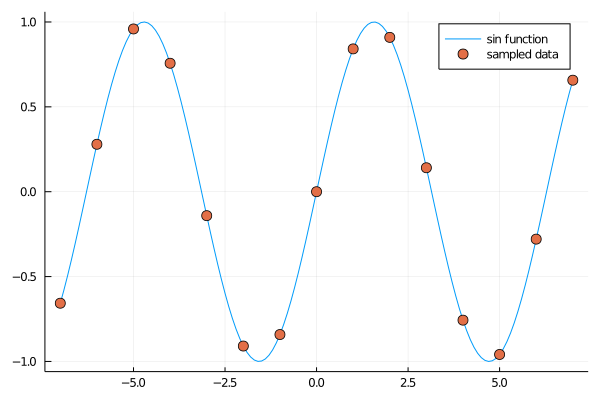

In [172]:
x = -7:7 # x points, coase grid
y = sin.(x) # corresponding y points
xf = -7:0.1:7
# fine grid
plot(xf, sin.(xf), label = "sin function")
scatter!(x, y, label = "sampled data", markersize = 6)

In [174]:
xf


-7.0:0.1:7.0

In [150]:
@show Vector(x);

Vector(x) = [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]


li(0.3) = 0.25244129544236954


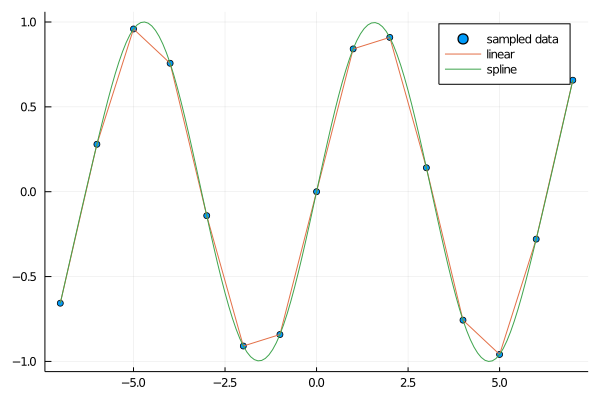

In [175]:
li = LinearInterpolation(x, y)
li_spline = CubicSplineInterpolation(x, y)
@show li(0.3) # evaluate at a single point
scatter(x, y, label = "sampled data", markersize = 4)
plot!(xf, li.(xf), label = "linear")
plot!(xf, li_spline.(xf), label = "spline")

In [180]:
x = log.(range(1.0, exp(4.0), length = 10)) .+ 1.0
y = log.(x) # corresponding y points
# uneven grid
interp = LinearInterpolation(x, y)

10-element extrapolate(interpolate((::Array{Float64,1},), ::Array{Float64,1}, Gridded(Linear())), Throw()) with element type Float64:
 0.0
 1.078243291384692
 1.2692144478848417
 1.3705114666867897
 1.4378678351679783
 1.4876678345403918
 1.526849691455871
 1.5589663785470187
 1.5860677045722646
 1.6094379124341003

In [191]:
splin = CubicSplineInterpolation(x, y) 
# error.. Bcs of uneven space for interpolation package
# other packages that do it

LoadError: MethodError: no method matching CubicSplineInterpolation(::Array{Float64,1}, ::Array{Float64,1})
Closest candidates are:
  CubicSplineInterpolation(!Matched::AbstractRange, ::AbstractArray{T,1} where T; bc, extrapolation_bc) at /home/maurice/.julia/packages/Interpolations/TBuvH/src/convenience-constructors.jl:8
  CubicSplineInterpolation(!Matched::Tuple{Vararg{AbstractRange,N}}, ::AbstractArray{T,N}; bc, extrapolation_bc) where {N, T} at /home/maurice/.julia/packages/Interpolations/TBuvH/src/convenience-constructors.jl:19

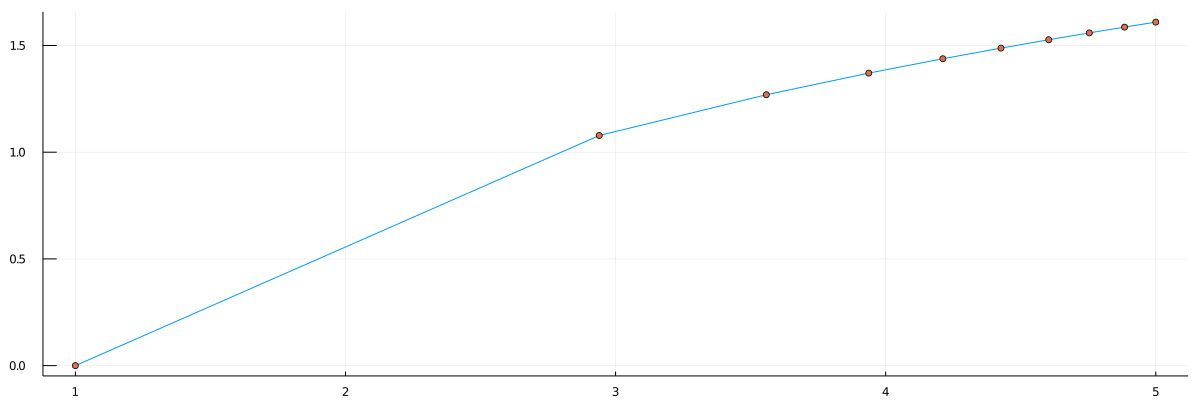

In [195]:
xf = log.(range(1,
exp(4), length = 100)) .+ 1 # finer grid
plot(xf, interp.(xf),label="")#, label = "linear"
scatter!(x, y,  
    markersize = 4, size = (1200, 400),label="") #label = "sampled data",

In [199]:
f(x,y) = log(x+y)
xs = 1:0.2:5
ys = 2:0.1:5
A = [f(x,y) for x in xs, y in ys];

In [197]:
interp_linear = LinearInterpolation((xs, ys), A)
@show interp_linear(3, 2) # exactly log(3 + 2)
@show interp_linear(3.1, 2.1) # approximate

interp_linear(3, 2) = 1.6094379124341003
interp_linear(3.1, 2.1) = 1.6484736801441782


1.6484736801441782

In [198]:
interp_cubic = CubicSplineInterpolation((xs, ys), A)
@show interp_cubic(3, 2) # exactly log(3 + 2)
@show interp_cubic(3.1, 2.1) # approximatel

interp_cubic(3, 2) = 1.6094379124341
interp_cubic(3.1, 2.1) = 1.6486586594237707


1.6486586594237707

In [204]:
L"an equation: $1 + \alpha^2$"

L"an equation: $1 + \alpha^2$"

In [218]:
@showprogress "Computing..." for i in 1:50 
    sleep(0.1) # some computation....
end

Computing...100%|███████████████████████████████████████| Time: 0:00:05


In [216]:
?sleep(.01)

```
sleep(seconds)
```

Block the current task for a specified number of seconds. The minimum sleep time is 1 millisecond or input of `0.001`.


In [26]:
using LinearAlgebra, Statistics
using DataFrames, RDatasets, 
DataFramesMeta, CategoricalArrays, 
Query, VegaLite
using GLM

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278
┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1278
┌ Info: Precompiling DataFramesMeta [1313f7d8-7da2-5740-9ea0-a2ca25f37964]
└ @ Base loading.jl:1278
┌ Info: Precompiling Query [1a8c2f83-1ff3-5112-b086-8aa67b057ba1]
└ @ Base loading.jl:1278
┌ Info: Precompiling VegaLite [112f6efa-9a02-5b7d-90c0-432ed331239a]
└ @ Base loading.jl:1278
┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1278


In [28]:
commodities = ["crude", "gas", "gold", "silver"]
last_price = [4.2, 11.3, 12.1, missing]
df = DataFrame(commod = commodities, price = last_price)

,commod,price
,String,Float64?
1,crude,4.2
2,gas,11.3
3,gold,12.1
4,silver,missing


In [30]:
@show df.price
@show df.commod

df.price = Union{Missing, Float64}[4.2, 11.3, 12.1, missing]
df.commod = ["crude", "gas", "gold", "silver"]


4-element Array{String,1}:
 "crude"
 "gas"
 "gold"
 "silver"

In [31]:
DataFrames.describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,commod,,crude,,silver,4,,String
2,price,9.2,4.2,11.3,12.1,,1,"Union{Missing, Float64}"


In [36]:
nt = (commod = "nickel", price= 5.1)
push!(df, nt)

,commod,price
,String,Float64?
1,crude,4.2
2,gas,11.3
3,gold,12.1
4,silver,missing
5,nickel,5.1


In [6]:
nt = (t = 1, col1 = 3.0)
df2 = DataFrame([nt])
push!(df2, (t=2, col1 = 4.0))

,t,col1
,Int64,Float64
1,1,3.0
2,2,4.0


In [38]:
df[!, :price]

5-element Array{Union{Missing, Float64},1}:
  4.2
 11.3
 12.1
   missing
  5.1

In [39]:
df[!, :price] *= 2.0
# double prices

5-element Array{Union{Missing, Float64},1}:
  8.4
 22.6
 24.2
   missing
 10.2

In [7]:
allowmissing!(df2, :col1) 
# necessary to add in a for col1
push!(df2, (t=3, col1 = missing))
push!(df2, (t=4, col1 = 5.1))

,t,col1
,Int64,Float64?
1,1,3.0
2,2,4.0
3,3,missing
4,4,5.1


In [43]:
@show mean(df2.col1)
@show mean(skipmissing(df2.col1))

mean(df2.col1) = missing
mean(skipmissing(df2.col1)) = 4.033333333333333


4.033333333333333

In [8]:
df2.col1.= coalesce.(df2.col1, 0.0) 
# replace all missing with 0.0

In [9]:
df2

,t,col1
,Int64,Float64?
1,1,3.0
2,2,4.0
3,3,0.0
4,4,5.1


In [10]:
using DataFramesMeta
f(x) = x^2
df2 = @transform(df2, col2 = f.(:col1))

,t,col1,col2
,Int64,Float64?,Float64
1,1,3.0,9.0
2,2,4.0,16.0
3,3,0.0,0.0
4,4,5.1,26.01


In [11]:
id = [1, 2, 3, 4]
y = ["old", "young", "young", "old"]
y = CategoricalArray(y)
df = DataFrame(id=id, y=y)

,id,y
,Int64,Cat…
1,1,old
2,2,young
3,3,young
4,4,old


In [12]:
levels(df.y)

2-element Array{String,1}:
 "old"
 "young"

In [13]:
x = 3.0
f(x) = x^2
g(x) = log(x)
@show g(f(x))
@show x |> f |> g;

g(f(x)) = 2.1972245773362196
(x |> f) |> g = 2.1972245773362196


In [14]:
df = DataFrame(name=["John", 
        "Sally", "Kirk"], 
    age=[23., 42., 59.], children=[3,5,2])
x = @from i in df begin
@where i.age>50
@select {i.name, i.children}
@collect DataFrame
end

,name,children
,String,Int64
1,Kirk,2


WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


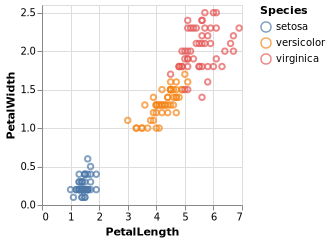

In [15]:
using RDatasets, VegaLite # Use R instead
iris = dataset("datasets", "iris")
iris |> @vlplot(
    :point,
    x=:PetalLength,
    y=:PetalWidth,
    color=:Species
)

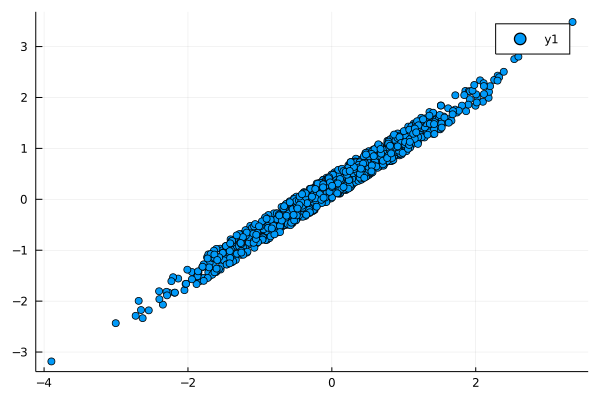

In [23]:
x = randn(1000)
y = 0.9 .* x + 0.5 * rand(1000)
df = DataFrame(x=x, y=y)
ols = lm(@formula(y ~ x), df) 
# R-style notation
scatter(x,y)


In [24]:
regtable(ols)


----------------------
                  y   
              --------
                   (1)
----------------------
(Intercept)   0.243***
               (0.005)
x             0.902***
               (0.005)
----------------------
Estimator          OLS
----------------------
N                1,000
R2               0.974
----------------------




In [34]:
using FixedEffectModels
cigar = dataset("plm", "Cigar")

@show names(cigar);

names(cigar) = ["State", "Year", "Price", "Pop", "Pop16", "CPI", "NDI", "Sales", "Pimin"]


In [32]:
cigar.StateCategorical = categorical(cigar.State)
cigar.YearCategorical = categorical(cigar.Year)
fixedeffectresults = reg(cigar, @formula(Sales ~ NDI + 
        fe(StateCategorical) + fe(YearCategorical)),
weights = :Pop, Vcov.cluster(:State))
regtable(fixedeffectresults)


----------------------------
                     Sales  
                   ---------
                         (1)
----------------------------
NDI                -0.005***
                     (0.001)
----------------------------
StateCategorical         Yes
YearCategorical          Yes
----------------------------
Estimator                OLS
----------------------------
N                      1,380
R2                     0.803
----------------------------




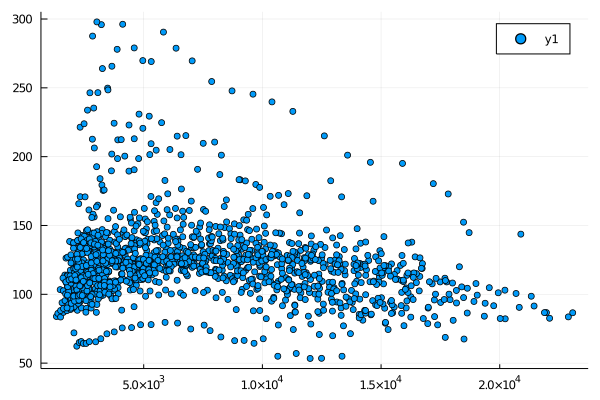

In [37]:
function f(x_1, x_2)
w_1 = x_1
w_2 = x_2
w_3 = w_1 * w_2
w_4 = sin(w_1)
w_5 = w_3 + w_4
return w_5
end

f (generic function with 2 methods)

In [47]:
using ForwardDiff
h(x) = sin(x[1]) + x[1] * x[2] + sinh(x[1] * x[2]) # multivariate.
x = [1.4 2.2]
@show ForwardDiff.gradient(h,x) # use AD, seeds from x

ForwardDiff.gradient(h, x) = [26.354764961030977 16.663053156992284]


1×2 Array{Float64,2}:
 26.3548  16.6631

In [93]:
#Or, can use complicated functions of many variables
f(x) = sum(sin, x) + prod(tan, x) * sum(sqrt,x)
q = x -> ForwardDiff.gradient(f, x)
# q() is now the gradient

In [93]:
ForwardDiff.hessian(f, x)

2×2 Array{Float64,2}:
 -1510.37    257.551
   257.551  -111.562

In [97]:
@show q(rand(5))
# gradient at a random point
# ForwardDiff.hessian(f,x') 
# or the hessian

q(rand(5)) = [0.7691951601647055, 0.6569260241621174, 1.2262637588979604, 0.9333240799789378, 1.1231658039013939]


5-element Array{Float64,1}:
 0.7691951601647055
 0.6569260241621174
 1.2262637588979604
 0.9333240799789378
 1.1231658039013939

In [107]:
function squareroot(x) #pretending we don't know sqrt()
z = copy(x) # Initial starting point for Newton’s method
while abs(z*z - x) > 1e-13
z = z - (z*z-x)/(2z)
end
return z
end
squareroot(2.0)

1.4142135623730951

In [117]:
dsqrt(x) = ForwardDiff.derivative(squareroot, x)
@show dsqrt(2.0)== 0.35355339059327373
.5*.5^.5

dsqrt(2.0) == 0.35355339059327373 = true


0.3535533905932738

In [118]:
h(x, y) = 3x^2 + 2x + 1 + y*x - y
gradient(h, 3.0, 5.0)
# argument가 tuple

(25.0, 2.0)

In [122]:
h(x) = 3x[1]^2 + 2x[1] + 1 + x[2]*x[1] - x[2]
ForwardDiff.gradient(h, [3.0, 5.0])
# argument가 array

2-element Array{Float64,1}:
 25.0
  2.0

In [125]:
D(f) = x-> gradient(f, x)[1]
# returns first in tuple
D_sin = D(sin)
D_sin(4.0)

-0.6536436208636119

In [128]:
p(x) = mean(abs, x)
@show p([1.0, 3.0, -2.0])
p'([1.0, 3.0, -2.0])

p([1.0, 3.0, -2.0]) = 2.0


3-element Array{Float64,1}:
  0.3333333333333333
  0.3333333333333333
 -0.3333333333333333

In [129]:
squareroot'(2.0)

0.3535533905932737

In [130]:
h(x,n) = (sum(x.^n))^(1/n)
gradient(h, [1.0, 4.0, 6.0], 2.0)

([0.13736056394868904, 0.5494422557947561, 0.8241633836921343], -1.2725553130925444 + 0.0im)

In [11]:
N = 1000000
y = rand(N)
λ = 0.01
obj(x) = sum((x .- y).^2) + λ*norm(x)
x_iv = rand(N)
function g!(G, x)
G .= obj'(x)
end

g! (generic function with 1 method)

In [2]:
results = optimize(obj, g!, x_iv, 
    LBFGS()) # or ConjugateGradient()
println("minimum = $(results.minimum) with in "*
"$(results.iterations) iterations")

LoadError: UndefVarError: obj not defined

In [5]:
using Optim
using Optim: converged, maximum, maximizer, minimizer, iterations 
#some extra functions
result = optimize(x-> x^2+7, -2.0, 1.0)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [-2.000000, 1.000000]
 * Minimizer: -1.144115e-08
 * Minimum: 7.000000e+00
 * Iterations: 58
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 59

In [8]:
@show converged(result) || error("Failed 
    to converge in $(iterations(result))
 iterations")
@show xmin = result.minimizer
result.minimum

converged(result) || error("Failed \n    to converge in $(iterations(result))\n iterations") = true
xmin = result.minimizer = -1.1441151142571214e-8


7.0

In [11]:
f(x) = -x^2+9
@show result = maximize(f, -2.0, 1.0)
converged(result) || error("Failed 
    to converge in $(iterations(result))
 iterations")
xmin = maximizer(result)
fmax = maximum(result)

result = maximize(f, -2.0, 1.0) = Results of Maximization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [-2.000000, 1.000000]
 * Maximizer: 1.028494e-16
 * Maximum: 9.000000e+00
 * Iterations: 6
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 7


9.0

In [12]:
f(x) = (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
x_iv = [0.0, 0.0]
results = optimize(f, x_iv) 
# i.e. optimize(f, x_iv, NelderMead())
# NelderMead is derivative free, but
# requires many ftn evals
# alternative is LBFGS(using gradient)

 * Status: success

 * Candidate solution
    Minimizer: [1.00e+00, 1.00e+00]
    Minimum:   3.525527e-09

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    60
    f(x) calls:    118


In [13]:
results = optimize(f, x_iv, LBFGS())
println("minimum = $(results.minimum) with argmin = $(results.minimizer) 
in "*"$(results.iterations) iterations")

minimum = 5.378388330692143e-17 with argmin = [0.9999999926662504, 0.9999999853325008] 
in 24 iterations


In [14]:
f(x) = (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
x_iv = [0.0, 0.0]
function g!(G, x)
G[1] = -2.0 * (1.0 - x[1]) - 400.0 * (x[2] - x[1]^2) * x[1]
G[2] = 200.0 * (x[2] - x[1]^2)
end
results = optimize(f, g!, x_iv, 
    LBFGS()) # or ConjugateGradient()

 * Status: success

 * Candidate solution
    Minimizer: [1.00e+00, 1.00e+00]
    Minimum:   5.191703e-27

 * Found with
    Algorithm:     L-BFGS
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    |x - x'|               = 4.58e-11 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.58e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.41e-19 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.50e+07 ≰ 0.0e+00
    |g(x)|                 = 1.44e-13 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    24
    f(x) calls:    67
    ∇f(x) calls:   67


In [ ]:
println("minimum = $(results.minimum) 
    with argmin = $(results.minimizer)
in "*"$(results.iterations) iterations")

In [15]:
f(x) = (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
x_iv = [0.0, 0.0]
results = optimize(f, x_iv, SimulatedAnnealing()) 
# or ParticleSwarm() or NelderMead()
# not converge, bcs limit of iter

 * Status: failure (reached maximum number of iterations) (line search failed)

 * Candidate solution
    Minimizer: [1.07e+00, 1.17e+00]
    Minimum:   7.878318e-02

 * Found with
    Algorithm:     Simulated Annealing
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    |x - x'|               = NaN ≰ 0.0e+00
    |x - x'|/|x'|          = NaN ≰ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = NaN ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    1001


In [15]:
using JuMP, Ipopt
# solve
# max( x[1] + x[2] )
# st sqrt(x[1]^2 + x[2]^2) <= 1
function squareroot(x) 
    # pretending we don't know sqrt()
z = x 
    # Initial starting point for Newton’s method
while abs(z*z - x) > 1e-13
z = z - (z*z-x)/(2z)
end
return z
end
m = Model(with_optimizer(Ipopt.Optimizer))
# need to register user defined functions for AD
JuMP.register(m,:squareroo,1, squareroot, autodiff=true) 
# 1 is number of argument here
@variable(m, x[1:2], start=6) 
# start is the initial condition
@objective(m, Max, sum(x))
@NLconstraint(m, squareroo(x[1]^2+x[2]^2) <= 1)
@show JuMP.optimize!(m)
@show value.(x)
@show sum(value.(x))

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

1.4142135740093271

In [16]:
# solve
# min (1-x)^2 + 100(y-x^2)^2)
# st x + y >= 10
using JuMP,Ipopt
m = Model(with_optimizer(Ipopt.Optimizer)) # settings for the solver
@variable(m, x, start = 0.0)
@variable(m, y, start = 0.0)
@NLobjective(m, Min, (1-x)^2 + 100(y-x^2)^2)
@show JuMP.optimize!(m)
println("x = ", value(x), " y = ", value(y))
# adding a (linear) constraint
@constraint(m, x + y == 10)
JuMP.optimize!(m)
println("x = ", value(x), " y = ", value(y))
(1-value(x))^2 + 100(value(y)-value(x)^2)^2

In [15]:
m = Model(with_optimizer(Ipopt.Optimizer)) # settings for the solver
# 1 is number of argument here
@variable(m, x[1:2], start=0) 
# start is the initial condition
@NLobjective(m, Min, (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2)
@show JuMP.optimize!(m)
@show value.(x)


This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

2-element Array{Float64,1}:
 0.9999999999999899
 0.9999999999999792

In [9]:
using BlackBoxOptim
function rosenbrock2d(x)
return (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
end

rosenbrock2d (generic function with 1 method)

In [10]:
results = bboptimize(rosenbrock2d; 
    SearchRange = (-5.0, 5.0), 
    NumDimensions = 2);

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 0.27 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 36805.73
Function evals per second = 37361.44
Improvements/step = 0.21270
Total function evaluations = 10152


Best candidate found: [1.0, 1.0]

Fitness: 0.000000000



In [16]:
#Ipopt ver of above model
m = Model(with_optimizer(Ipopt.Optimizer)) # settings for the solver
# 1 is number of argument here
@variable(m, x[1:2], start=0) 
# start is the initial condition
@NLobjective(m, Min, (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2)
@show JuMP.optimize!(m)
@show value.(x)

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

2-element Array{Float64,1}:
 0.9999999999999899
 0.9999999999999792

In [19]:
using Roots
f(x) = sin(4 * (x - 1/4)) + x + x^20 - 1
fzero(f, 0, .5)

0.40829350427936706

In [47]:
using NLsolve
f(x) = [(x[1]+3)*(x[2]^3-7)+18
sin(x[2]*exp(x[1])-1)] # returns an array
results = nlsolve(f, [ 0.1, 1.2])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 1.2]
 * Zero: [-7.775548712324193e-17, 0.9999999999999999]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [46]:
results = nlsolve(f, [ 0.1; 1.2], autodiff=:forward)
println("converged=$(NLsolve.converged(results)) at root=$(results.zero) in "*
"$(results.iterations) iterations and $(results.f_calls) function calls")

converged=true at root=[-3.7818049096324184e-16, 1.0000000000000002] in 4 iterations and 5 function calls


In [48]:
results = nlsolve(f, [ 0.1; 1.2], autodiff=:forward)
println("converged=$(NLsolve.converged(results)) at root=$(results.zero) in "*
"$(results.iterations) iterations and $(results.f_calls) function calls")

converged=true at root=[-3.7818049096324184e-16, 1.0000000000000002] in 4 iterations and 5 function calls


In [52]:
function f!(F, x) # modifies the first argument
F[1] = (x[1]+3)*(x[2]^3-7)+18
    F[2] = sin(x[2]*exp(x[1])-1)
end
results = nlsolve(f!, [ 0.1; 1.2], autodiff=:forward)
println("converged=$(NLsolve.converged(results)) at root=$(results.zero) in "*
"$(results.iterations) iterations and $(results.f_calls) function calls")

converged=true at root=[-3.7818049096324184e-16, 1.0000000000000002] in 4 iterations and 5 function calls


In [57]:
using LeastSquaresOptim
function rosenbrock(x)
[1 - x[1], 100 * (x[2]-x[1]^2)]
end
LeastSquaresOptim.optimize(rosenbrock, zeros(2), Dogleg())

Results of Optimization Algorithm
 * Algorithm: Dogleg
 * Minimizer: [1.0,1.0]
 * Sum of squares at Minimum: 0.000000
 * Iterations: 51
 * Convergence: true
 * |x - x'| < 1.0e-08: false
 * |f(x) - f(x')| / |f(x)| < 1.0e-08: true
 * |g(x)| < 1.0e-08: false
 * Function Calls: 52
 * Gradient Calls: 36
 * Multiplication Calls: 159


In [63]:
function rosenbrock_f!(out, x)
out[1] = 1 - x[1]
out[2] = 100 * (x[2]-x[1]^2)
end
LeastSquaresOptim.optimize!(LeastSquaresProblem(x = [-1.0,3],
f! = rosenbrock_f!, output_length = 2))

Results of Optimization Algorithm
 * Algorithm: Dogleg
 * Minimizer: [1.0,1.0]
 * Sum of squares at Minimum: 0.000000
 * Iterations: 74
 * Convergence: true
 * |x - x'| < 1.0e-08: false
 * |f(x) - f(x')| / |f(x)| < 1.0e-08: true
 * |g(x)| < 1.0e-08: false
 * Function Calls: 75
 * Gradient Calls: 42
 * Multiplication Calls: 200


In [65]:
function rosenbrock_g!(J, x)
J[1, 1] = -1
J[1, 2] = 0
J[2, 1] = -200 * x[1]
J[2, 2] = 100
end
LeastSquaresOptim.optimize!(LeastSquaresProblem(x = zeros(2),
f! = rosenbrock_f!, g! = rosenbrock_g!, output_length =2))

Results of Optimization Algorithm
 * Algorithm: Dogleg
 * Minimizer: [1.0,1.0]
 * Sum of squares at Minimum: 0.000000
 * Iterations: 51
 * Convergence: true
 * |x - x'| < 1.0e-08: false
 * |f(x) - f(x')| / |f(x)| < 1.0e-08: true
 * |g(x)| < 1.0e-08: false
 * Function Calls: 52
 * Gradient Calls: 36
 * Multiplication Calls: 159


In [81]:
]st

Status `~/quantecon-notebooks-julia/Project.toml`
  [2169fc97] AlgebraicMultigrid v0.2.2
  [28f2ccd6] ApproxFun v0.12.2
  [7d9fca2a] Arpack v0.4.0
  [aae01518] BandedMatrices v0.15.15
  [6e4b80f9] BenchmarkTools v0.5.0
  [a134a8b2] BlackBoxOptim v0.5.0
  [ffab5731] BlockBandedMatrices v0.8.11
  [324d7699] CategoricalArrays v0.8.3
  [34da2185] Compat v2.2.1
  [e66e0078] CompilerSupportLibraries_jll v0.3.3+0
  [a93c6f00] DataFrames v0.21.7
  [1313f7d8] DataFramesMeta v0.5.1
  [39dd38d3] Dierckx v0.5.0
  [9fdde737] DiffEqOperators v4.12.0
  [0c46a032] DifferentialEquations v6.15.0
  [31c24e10] Distributions v0.21.12
  [2fe49d83] Expectations v1.1.1
  [a1e7a1ef] Expokit v0.2.0
  [d4d017d3] ExponentialUtilities v1.8.0
  [442a2c76] FastGaussQuadrature v0.4.3
  [1a297f60] FillArrays v0.8.14
  [9d5cd8c9] FixedEffectModels v0.10.9
  [c8885935] FixedEffects v0.7.4
  [587475ba] Flux v0.11.1
  [f6369f11] ForwardDiff v0.10.12
  [38e38edf] GLM v1.3.10
  [28b8d3ca] GR v0.52.0
  [7073ff75] IJulia v1.2

In [83]:
]generate PhdThesisEnvironment

 Generating  project PhdThesisEnvironment:
    PhdThesisEnvironment/Project.toml
    PhdThesisEnvironment/src/PhdThesisEnvironment.jl


In [84]:
; cd PhdThesisEnvironment

/home/maurice/quantecon-notebooks-julia/PhdThesisEnvironment


In [85]:
]activate .

 Activating environment at `~/quantecon-notebooks-julia/PhdThesisEnvironment/Project.toml`


In [86]:
;cd ..

/home/maurice/quantecon-notebooks-julia


In [87]:
]activate .

 Activating environment at `~/quantecon-notebooks-julia/Project.toml`


In [88]:
;cd PhdThesisEnvironment

/home/maurice/quantecon-notebooks-julia/PhdThesisEnvironment


In [89]:
]activate

 Activating environment at `~/quantecon-notebooks-julia/Project.toml`


In [91]:
; rm  PhdThesisEnvironment

rm: cannot remove 'PhdThesisEnvironment': No such file or directory


In [5]:
# add methods to existing functions.
import Base: +
+(x::Integer, y::String) = x + parse(Int, y)
@show +(100, "100")
@show 100 + "100"; # equivalent

In [9]:
@show (typeof(100.0) <: Integer) == false
100.0 + "100"

(typeof(100.0) <: Integer) == false = true


LoadError: MethodError: no method matching +(::Float64, ::String)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:538
  +(!Matched::MutableArithmetics.Zero, ::Any) at /home/maurice/.julia/packages/MutableArithmetics/NuiNA/src/rewrite.jl:52
  +(!Matched::ChainRulesCore.Zero, ::Any) at /home/maurice/.julia/packages/ChainRulesCore/Q5Nrj/src/differential_arithmetic.jl:47
  ...

In [10]:
function q(x) # or q(x::Any)
println("Default (Any) method invoked")
end
function q(x::Number)
println("Number method invoked")
end
function q(x::Integer)
println("Integer method invoked")
end

q (generic function with 3 methods)

In [15]:
q("아")


Default (Any) method invoked


In [21]:
# For the most part, time spent “optimizing” Julia code to run faster 
# is about ensuring the compiler can correctly deduce types for all 
# functions.
x = [1, 2, 3]
f(x) = 2.0x
#compare with f(x) = 2x
@code_warntype f(x)

Variables
  #self#::Core.Compiler.Const(f, false)
  x::Array{Int64,1}

Body::Array{Float64,1}
1 ─ %1 = (2.0 * x)::Array{Float64,1}
└──      return %1


In [24]:
f(x) = x > 0.0 ? x : nothing
@code_warntype f(1)

Variables
  #self#::Core.Compiler.Const(f, false)
  x::Int64

Body::Union{Nothing, Int64}
1 ─ %1 = (x > 0.0)::Bool
└──      goto #3 if not %1
2 ─      return x
3 ─      return Main.nothing


In [22]:
@show zero(2.3)
@show zero(4)
@show zero(2.0 + 3im)
f(x) = x > 0.0 ? x : zero(x) #smart!
@code_warntype f(1.0)

zero(2.3) = 0.0
zero(4) = 0
zero(2.0 + 3im) = 0.0 + 0.0im
Variables
  #self#::Core.Compiler.Const(f, false)
  x::Float64

Body::Float64
1 ─ %1 = (x > 0.0)::Bool
└──      goto #3 if not %1
2 ─      return x
3 ─ %4 = Main.zero(x)::Core.Compiler.Const(0.0, false)
└──      return %4


In [25]:
function f(a, b)
y = (a + 8b)^2
return 7y
end

f (generic function with 2 methods)

In [26]:
@code_native f(1, 2)

	.text
; ┌ @ In[25]:2 within `f'
; │┌ @ int.jl:86 within `+'
	leaq	(%rdi,%rsi,8), %rcx
; │└
; │┌ @ intfuncs.jl:296 within `literal_pow'
; ││┌ @ int.jl:87 within `*'
	imulq	%rcx, %rcx
; │└└
; │ @ In[25]:3 within `f'
; │┌ @ int.jl:87 within `*'
	leaq	(,%rcx,8), %rax
	subq	%rcx, %rax
; │└
	retq
	nopw	%cs:(%rax,%rax)
	nop
; └


In [ ]:
# Sometimes the JIT compiler produces messy, slow machine code.
# This happens when type inference fails or the compiler has 
# insufficient information to opti-mize effectively.

In [27]:
b = 1.0
function g(a)
global b
for i = 1:1_000_000
tmp = a + b
end
end

g (generic function with 1 method)

In [28]:
@btime g(1.0)

  30.025 ms (2000000 allocations: 30.52 MiB)


In [29]:
@code_native g(1.0)

	.text
; ┌ @ In[27]:2 within `g'
	pushq	%rbp
	pushq	%r15
	pushq	%r14
	pushq	%r13
	pushq	%r12
	pushq	%rbx
	subq	$56, %rsp
	movsd	%xmm0, 32(%rsp)
	xorps	%xmm0, %xmm0
	movaps	%xmm0, 16(%rsp)
	movaps	%xmm0, (%rsp)
	movq	%fs:0, %rax
	movq	$8, (%rsp)
	movq	-15720(%rax), %rcx
	movq	%rcx, 8(%rsp)
	movq	%rsp, %rcx
	movq	%rcx, -15720(%rax)
	leaq	-15720(%rax), %r12
	movl	$1000000, %ebx          # imm = 0xF4240
	movabsq	$jl_apply_generic, %rbp
	movabsq	$jl_system_image_data, %r14
	leaq	40(%rsp), %r15
	nopl	(%rax)
; │ @ In[27]:5 within `g'
L112:
	movabsq	$140262593886728, %rax  # imm = 0x7F916E157A08
	movq	(%rax), %r13
	movq	%r13, 16(%rsp)
	movq	%r12, %rdi
	movl	$1400, %esi             # imm = 0x578
	movl	$16, %edx
	movabsq	$jl_gc_pool_alloc, %rax
	callq	*%rax
	movabsq	$jl_system_image_data, %rcx
	movq	%rcx, -8(%rax)
	movsd	32(%rsp), %xmm0         # xmm0 = mem[0],zero
	movsd	%xmm0, (%rax)
	movq	%rax, 24(%rsp)
	movq	%rax, 40(%rsp)
	movq	%r13, 48(%rsp)
	movq	%r14, %rdi
	movq	%r15, %rsi
	movl	$2, %edx

In [30]:
function g(a, b)
for i=1:1_000_000
tmp = a + b
end
end

g (generic function with 2 methods)

In [31]:
@btime g(1.0, 1.0)

  2.207 ns (0 allocations: 0 bytes)


In [32]:
@code_native g(1.0, 1.0)

	.text
; ┌ @ In[30]:3 within `g'
	retq
	nopw	%cs:(%rax,%rax)
	nopl	(%rax,%rax)
; └


In [33]:
const b_const = 1.0
function g(a)
global b_const
for i = 1:1_000_000
tmp = a + b_const
end
end

g (generic function with 2 methods)

In [36]:
@btime g(1.0)

  2.207 ns (0 allocations: 0 bytes)


In [37]:
@code_native g(1.0)

	.text
; ┌ @ In[33]:5 within `g'
	retq
	nopw	%cs:(%rax,%rax)
	nopl	(%rax,%rax)
; └


In [38]:
struct Foo_generic
a
end
struct Foo_abstract
a::Real
end
struct Foo_concrete{T <: Real}
a::T
end

In [39]:
fg = Foo_generic(1.0)
fa = Foo_abstract(1.0)
fc = Foo_concrete(1.0)

Foo_concrete{Float64}(1.0)

In [45]:
typeof(fa)


Foo_abstract

In [46]:
function f(foo)
for i = 1:1_000_000
tmp = i + foo.a
end
end

f (generic function with 2 methods)

In [47]:
@btime f($fg)

  31.679 ms (1999489 allocations: 30.51 MiB)


In [48]:
@code_native f(fg)

	.text
; ┌ @ In[46]:1 within `f'
	pushq	%rbp
	pushq	%r15
	pushq	%r14
	pushq	%r13
	pushq	%r12
	pushq	%rbx
	subq	$56, %rsp
	xorps	%xmm0, %xmm0
	movaps	%xmm0, (%rsp)
	movq	$0, 16(%rsp)
	movq	%fs:0, %rax
; │ @ In[46]:3 within `f'
; │┌ @ Base.jl within `getproperty'
	movq	$4, (%rsp)
	movq	-15720(%rax), %rcx
	movq	%rcx, 8(%rsp)
	movq	%rsp, %rcx
	movq	%rcx, -15720(%rax)
	leaq	-15720(%rax), %rax
	movq	%rax, 32(%rsp)
	movq	(%rdi), %r13
	movl	$1, %ebx
	movabsq	$jl_box_int64, %rbp
	movabsq	$jl_apply_generic, %r12
	movabsq	$jl_system_image_data, %r14
	leaq	40(%rsp), %r15
	nopl	(%rax)
; │└
L128:
	movq	%rbx, %rdi
	callq	*%rbp
	movq	%rax, 16(%rsp)
	movq	%rax, 40(%rsp)
	movq	%r13, 48(%rsp)
	movq	%r14, %rdi
	movq	%r15, %rsi
	movl	$2, %edx
	callq	*%r12
; │┌ @ range.jl:624 within `iterate'
	incq	%rbx
; ││┌ @ promotion.jl:398 within `=='
	cmpq	$1000001, %rbx          # imm = 0xF4241
; │└└
	jne	L128
	movq	8(%rsp), %rax
	movq	32(%rsp), %rcx
	movq	%rax, (%rcx)
; │ @ In[46]:3 within `f'
	addq	$56, %rsp
	popq	

In [75]:
@btime f($fa)
@code_native f(fa)

  32.943 ms (1999489 allocations: 30.51 MiB)
	.text
; ┌ @ In[46]:1 within `f'
	pushq	%rbp
	pushq	%r15
	pushq	%r14
	pushq	%r13
	pushq	%r12
	pushq	%rbx
	subq	$56, %rsp
	xorps	%xmm0, %xmm0
	movaps	%xmm0, (%rsp)
	movq	$0, 16(%rsp)
	movq	%fs:0, %rax
; │ @ In[46]:3 within `f'
; │┌ @ Base.jl within `getproperty'
	movq	$4, (%rsp)
	movq	-15720(%rax), %rcx
	movq	%rcx, 8(%rsp)
	movq	%rsp, %rcx
	movq	%rcx, -15720(%rax)
	leaq	-15720(%rax), %rax
	movq	%rax, 32(%rsp)
	movq	(%rdi), %r13
	movl	$1, %ebx
	movabsq	$jl_box_int64, %rbp
	movabsq	$jl_apply_generic, %r12
	movabsq	$jl_system_image_data, %r14
	leaq	40(%rsp), %r15
	nopl	(%rax)
; │└
L128:
	movq	%rbx, %rdi
	callq	*%rbp
	movq	%rax, 16(%rsp)
	movq	%rax, 40(%rsp)
	movq	%r13, 48(%rsp)
	movq	%r14, %rdi
	movq	%r15, %rsi
	movl	$2, %edx
	callq	*%r12
; │┌ @ range.jl:624 within `iterate'
	incq	%rbx
; ││┌ @ promotion.jl:398 within `=='
	cmpq	$1000001, %rbx          # imm = 0xF4241
; │└└
	jne	L128
	movq	8(%rsp), %rax
	movq	32(%rsp), %rcx
	movq	%rax, (%rcx)
; │

In [54]:
@btime f($fc) # LISP style metaprogramming. $ is interpolation

In [56]:
@code_native f(fc)

	.text
; ┌ @ In[46]:3 within `f'
	retq
	nopw	%cs:(%rax,%rax)
	nopl	(%rax,%rax)
; └


In [61]:
c=:($fc+2)

:(Foo_concrete{Float64}(1.0) + 2)

In [76]:
function sum_float_array(x::AbstractVector{<:Number})
sum = 0.0
for i = eachindex(x)
sum += x[i]
end
return sum
end

sum_float_array (generic function with 1 method)

In [73]:
x = range(0, 1, length = Int(1e6))
x = collect(x)
typeof(x)

Array{Float64,1}

In [91]:
sum_float_array(x)

LoadError: MethodError: no method matching sum_float_array(::Array{Any,1})
Closest candidates are:
  sum_float_array(!Matched::AbstractArray{var"#s526",1} where var"#s526"<:Number) at In[76]:1

In [81]:
@btime sum_float_array($x)
@code_warntype sum_float_array(x)

In [97]:
function sum_array(x)
sum = 0.0
for i = eachindex(x)
sum += x[i]
end
return sum
end

sum_array (generic function with 2 methods)

In [78]:
@code_native sum_float_array(x)

	.text
; ┌ @ In[76]:1 within `sum_float_array'
	pushq	%rbp
	movq	%rsp, %rbp
; │ @ In[76]:3 within `sum_float_array'
; │┌ @ abstractarray.jl:212 within `eachindex'
; ││┌ @ abstractarray.jl:95 within `axes1'
; │││┌ @ abstractarray.jl:75 within `axes'
; ││││┌ @ array.jl:155 within `size'
	movq	24(%rdi), %rcx
	xorl	%eax, %eax
; ││││└
; ││││┌ @ tuple.jl:157 within `map'
; │││││┌ @ range.jl:326 within `OneTo' @ range.jl:317
; ││││││┌ @ promotion.jl:409 within `max'
	testq	%rcx, %rcx
	cmovnsq	%rcx, %rax
; │└└└└└└
	jle	L68
; │ @ In[76]:4 within `sum_float_array'
; │┌ @ array.jl within `getindex'
	movq	(%rdi), %rdx
	movq	8(%rdi), %rsi
; ││ @ array.jl:809 within `getindex'
	leaq	1(%rsi), %r8
	xorpd	%xmm0, %xmm0
	xorl	%ecx, %ecx
	nopw	%cs:(%rax,%rax)
	nop
L48:
	cmpq	%rcx, %rsi
	je	L77
; │└
; │┌ @ float.jl:401 within `+'
	addsd	(%rdx,%rcx,8), %xmm0
; │└
; │┌ @ range.jl:624 within `iterate'
; ││┌ @ promotion.jl:398 within `=='
	incq	%rcx
	cmpq	%rcx, %rax
; │└└
	jne	L48
	jmp	L72
L68:
	xorpd	%xmm0, %

In [85]:
sum(x)

500000.0

In [82]:
@btime sum($x)
@code_warntype sum(x)
@code_native sum(x)

  611.759 μs (0 allocations: 0 bytes)
Variables
  #self#::Core.Compiler.Const(sum, false)
  a::Array{Float64,1}

Body::Float64
1 ─      nothing
│   %2 = Base.:(var"#sum#627")(Base.:(:), #self#, a)::Float64
└──      return %2
	.text
; ┌ @ reducedim.jl:722 within `sum'
	pushq	%rax
; │┌ @ reducedim.jl:722 within `#sum#627'
; ││┌ @ reducedim.jl:726 within `_sum' @ reducedim.jl:727
; │││┌ @ reducedim.jl:310 within `mapreduce'
; ││││┌ @ reducedim.jl:310 within `#mapreduce#620'
; │││││┌ @ reducedim.jl:318 within `_mapreduce_dim'
; ││││││┌ @ reduce.jl:397 within `_mapreduce'
; │││││││┌ @ indices.jl:453 within `LinearIndices'
; ││││││││┌ @ abstractarray.jl:75 within `axes'
; │││││││││┌ @ array.jl:155 within `size'
	movq	24(%rdi), %rax
	xorl	%edx, %edx
; │││││││││└
; │││││││││┌ @ tuple.jl:157 within `map'
; ││││││││││┌ @ range.jl:326 within `OneTo' @ range.jl:317
; │││││││││││┌ @ promotion.jl:409 within `max'
	testq	%rax, %rax
	cmovnsq	%rax, %rdx
; │││││││└└└└└
; │││││││ @ reduce.jl:399 within `

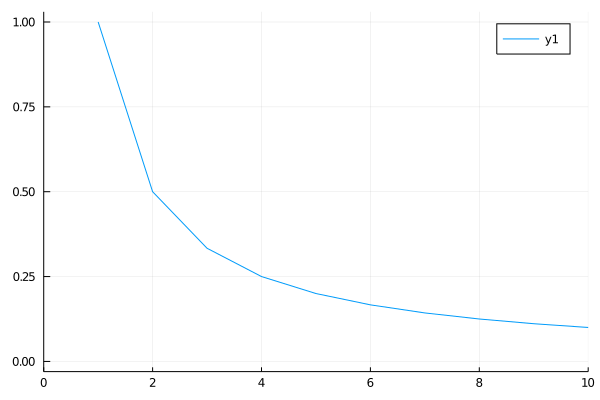

In [109]:
x = Any[ 1/i for i = 1:1e6 ];
plot(x,xlims=(0,10))

In [102]:
@btime sum_array($x)

  23.047 ms (1000000 allocations: 15.26 MiB)


14.392726722864989

In [2]:
using LinearAlgebra, Statistics, Plots

In [115]:
@show x_vals = [0 0 0 ; 2 -3 -4]
@show y_vals = [0 0 0 ; 4 3 -3.5];

x_vals = [0 0 0; 2 -3 -4] = [0 0 0; 2 -3 -4]
y_vals = [0 0 0; 4 3 -3.5] = [0.0 0.0 0.0; 4.0 3.0 -3.5]


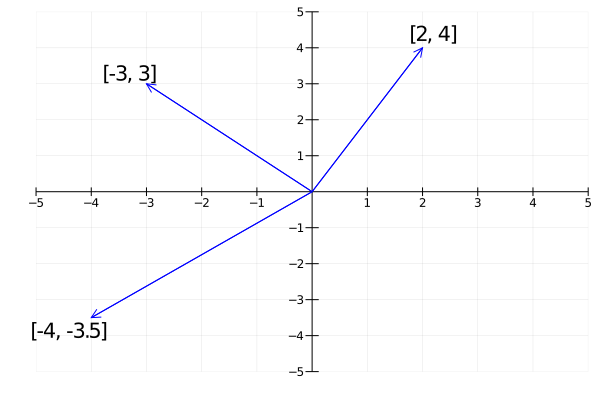

In [116]:
plot(x_vals, y_vals, arrow = true, color = :blue,
legend = :none, xlims = (-5, 5), ylims = (-5, 5),
annotations = [(2.2, 4.4, "[2, 4]"),
(-3.3, 3.3, "[-3, 3]"),
(-4.4, -3.85, "[-4, -3.5]")],
xticks = -5:1:5, yticks = -5:1:5,
framestyle = :origin)

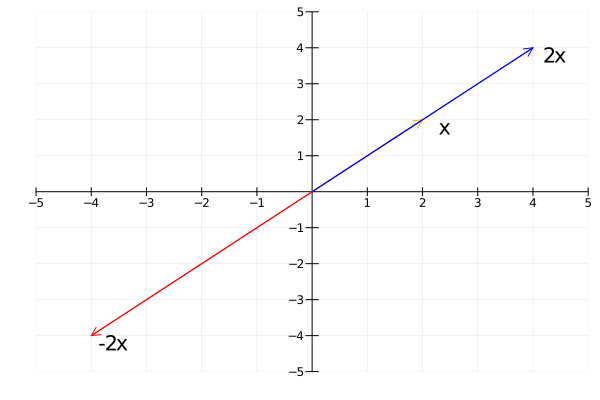

In [126]:
x = [2]
scalars = [-2 1 2]
vals = [0 0 0; x * scalars]
labels=[(-3.6, -4.2, "-2x"), (2.4, 1.8, "x"), (4.4, 3.8, "2x")]
plot(vals, vals, arrow = true, color = [:red :orange :blue],
legend = :none, xlims = (-5, 5), ylims = (-5, 5),
    annotations = labels, xticks = -5:1:5, yticks = -5:1:5,
framestyle = :origin)

In [127]:
x = ones(3)

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

In [156]:
y = [2, 4, 6]

3-element Array{Int64,1}:
 2
 4
 6

In [136]:
a = 1:5

b = ["e","d","b","c","a"]
c = zip(a,b)

#same with c=zip(1:5, ["e", "d", "b", "c", "a"])

zip(1:5, ["e", "d", "b", "c", "a"])

In [142]:
first(c)

(1, "e")

In [143]:
sqrt(sum(abs2, x))

1.7320508075688772

In [144]:
norm(x)

1.7320508075688772

In [3]:
f(x, y) = 0.2x + 0.1y

f (generic function with 1 method)

In [4]:
# lines to vectors
x_vec =[0 0; 3 3]
y_vec =[0 0; 4 -4]
z_vec =[0 0; f(3, 4) f(3, -4)]

2×2 Array{Float64,2}:
 0.0  0.0
 1.0  0.2

In [5]:
# draw the plane
n = 20

20

In [6]:
grid = range(-5,5, length = n)

-5.0:0.5263157894736842:5.0

In [7]:
z2 = [ f(grid[row], grid[col]) for row in 1:n, col in 1:n ]

20×20 Array{Float64,2}:
 -1.5        -1.44737    -1.39474    …  -0.605263   -0.552632   -0.5
 -1.39474    -1.34211    -1.28947       -0.5        -0.447368   -0.394737
 -1.28947    -1.23684    -1.18421       -0.394737   -0.342105   -0.289474
 -1.18421    -1.13158    -1.07895       -0.289474   -0.236842   -0.184211
 -1.07895    -1.02632    -0.973684      -0.184211   -0.131579   -0.0789474
 -0.973684   -0.921053   -0.868421   …  -0.0789474  -0.0263158   0.0263158
 -0.868421   -0.815789   -0.763158       0.0263158   0.0789474   0.131579
 -0.763158   -0.710526   -0.657895       0.131579    0.184211    0.236842
 -0.657895   -0.605263   -0.552632       0.236842    0.289474    0.342105
 -0.552632   -0.5        -0.447368       0.342105    0.394737    0.447368
 -0.447368   -0.394737   -0.342105   …   0.447368    0.5         0.552632
 -0.342105   -0.289474   -0.236842       0.552632    0.605263    0.657895
 -0.236842   -0.184211   -0.131579       0.657895    0.710526    0.763158
 -0.131579   -0.0

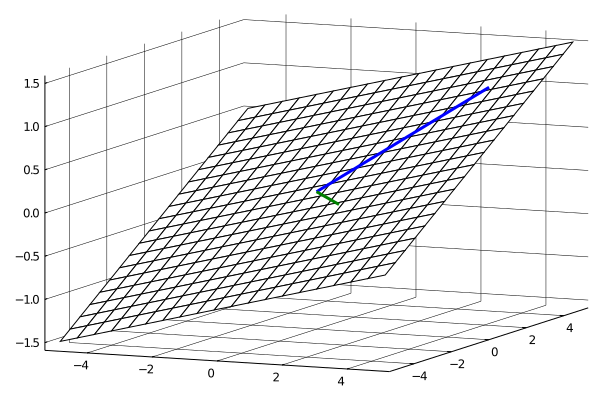

In [21]:
wireframe(grid, grid, z2, fill = :blues, gridalpha =1000 )
plot!(x_vec, y_vec, z_vec, color = [:blue :green], linewidth = 3, 
    labels= "", colorbar = false)

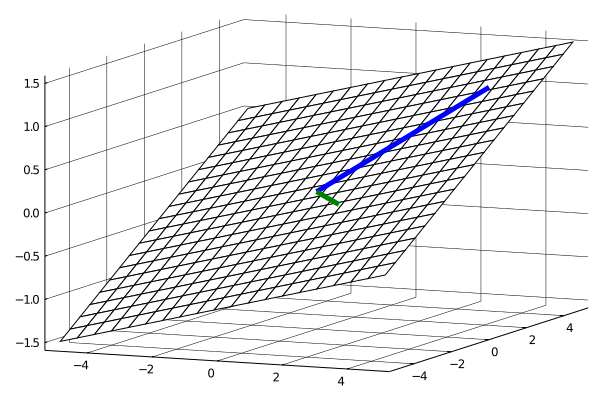

In [16]:
wireframe(grid, grid, z2, fill = :blues, gridalpha =1 )
plot!(x_vec, y_vec, z_vec, color = [:blue :green], linewidth = 5, 
    labels= "", colorbar = false)

In [45]:
f(x) = 0.6cos(4x) + 1.3
grid = range(-2, 2, length = 100)
y_min, y_max = extrema( f(x) for x in grid )

(0.700029536547185, 1.898885395947853)

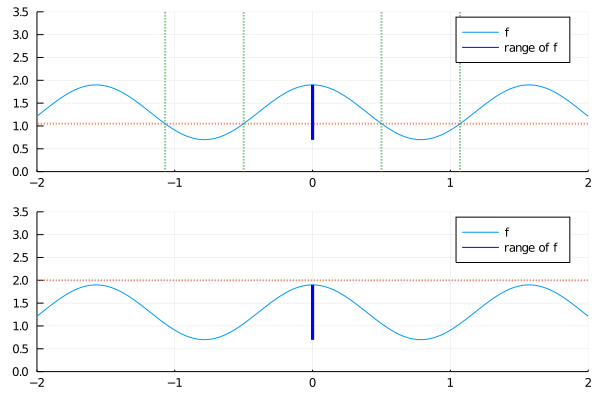

In [52]:
plt1 = plot(f, xlim = (-2, 2), label = "f")
hline!(plt1, [f(0.5)], linestyle = :dot, linewidth = 2, label = "")
vline!(plt1, [-1.07, -0.5, 0.5, 1.07], linestyle = :dot, linewidth = 2, 
    label = "")
plot!(plt1, fill(0,2), [y_min y_min; y_max y_max], lw = 3, 
    color = :blue, label = ["range of f" ""])
plt2 = plot(f, xlim = (-2, 2), label = "f")
hline!(plt2, [2], linestyle = :dot, linewidth = 2, label = "")
plot!(plt2, fill(0, 2), [y_min y_min; y_max y_max], lw = 3, 
    color = :blue, label = ["range of f" ""])
plot(plt1, plt2, layout = (2, 1), ylim = (0, 3.5))

In [87]:
#By and large, wrong codes
A = [1 3
2 4]
evals, evecs = eigen(A)
a1, a2 = evals
eig_1 = [0 0; evecs[:,1]']
eig_2 = [0 0; evecs[:,2]']
@show eigen(A)
plot(eig_1, eig_2, arrow = true, color = :blue)
x = range(-5, 5, length = 10)
y = -x
plot(eig_1[:, 2], a1 * eig_2[:, 2], arrow = true, color = :red,
legend = :none, xlims = (-3, 3), ylims = (-3, 3), xticks = -3:3, 
    yticks = -3:3, framestyle = :origin)
plot!(a2 * eig_1[:, 2], a2 * eig_2, arrow = true, color = :red)
plot!(eig_1, eig_2, arrow = true, color = :blue)
plot!(x, y, color = :blue, lw = 0.4, alpha = 0.6)
plot!(x, x, color = :blue, lw = 0.4, alpha = 0.6)

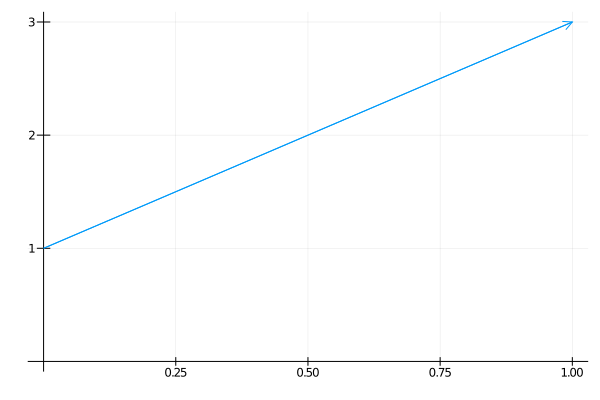

In [93]:
plot([0;1],[1,3],arrow=true,framestyle =:origin,legend=:none)

In [94]:
using LinearAlgebra, Statistics

In [95]:
function gram_schmidt(X)
U = similar(X, Float64) # for robustness
function normalized_orthogonal_projection(b, Z)
# project onto the orthogonal complement of the col span of Z
orthogonal = I - Z * inv(Z'Z) * Z'
projection = orthogonal * b
# normalize
return projection / norm(projection)
end
for col in 1:size(U, 2)
# set up
b = X[:,col]
# vector we're going to project
Z = X[:,1:col - 1] # first i-1 columns of X
U[:,col] = normalized_orthogonal_projection(b, Z)
end
return U
end

gram_schmidt (generic function with 1 method)

In [96]:
y = [1, 3, -3]
X = [1 0; 0 -6; 2 2];
Py1 = X * inv(X'X) * X' * y

3-element Array{Float64,1}:
 -0.5652173913043479
  3.2608695652173916
 -2.217391304347826

In [97]:
U = gram_schmidt(X)

3×2 Array{Float64,2}:
 0.447214  -0.131876
 0.0       -0.989071
 0.894427   0.065938

In [100]:
Py2 = U * U' * y

3-element Array{Float64,1}:
 -0.5652173913043477
  3.2608695652173916
 -2.2173913043478257

In [102]:
Q, R = qr(X)


LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
3×3 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.447214  -0.131876  -0.884652
  0.0       -0.989071   0.147442
 -0.894427   0.065938   0.442326
R factor:
2×2 Array{Float64,2}:
 -2.23607  -1.78885
  0.0       6.0663

In [104]:
Q = Matrix(Q)

3×2 Array{Float64,2}:
 -0.447214  -0.131876
  0.0       -0.989071
 -0.894427   0.065938

In [105]:
Py3 = Q * Q' * y

3-element Array{Float64,1}:
 -0.5652173913043473
  3.2608695652173907
 -2.2173913043478253

In [106]:
using Plots, Distributions, Random, Statistics
gr(fmt = :png, size = (900, 500))

Plots.GRBackend()